# Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Library
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Import Data

1. Customer ID (A unique customer identifier)
2. Tenure Months (How long the customer has been with the company by the
end of the quarter specified above)
3. Location (Customer’s residence - City)
4. Device Class (Device classification)
5. Games Product (Whether the customer uses the internet service for games
product)
6. Music Product (Whether the customer uses the internet service for music
product)
7. Education Product (Whether the customer uses the internet service for
education product)
8. Call Center (Whether the customer uses the call center service)
9. Video Product (Whether the customer uses video product service)
10. Use MyApp (Whether the customer uses MyApp service)
11. Payment Method (The method used for paying the bill)
12. Monthly Purchase (Total customer’s monthly spent for all services with the unit of thousands of IDR)
13. Churn Label (Whether the customer left the company within a time period)
14. Longitude (Customer’s residence - Longitude)
15. Latitude (Customer’s residence - Latitude)
16. CLTV (Customer Lifetime Value with the unit of thousands of IDR -Calculated using company’s formulas)

In [ ]:
df = pd.read_excel('Data (2).xlsx')
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [ ]:
df.isnull().any()

Customer ID                     False
Tenure Months                   False
Location                        False
Device Class                    False
Games Product                   False
Music Product                   False
Education Product               False
Call Center                     False
Video Product                   False
Use MyApp                       False
Payment Method                  False
Monthly Purchase (Thou. IDR)    False
Churn Label                     False
Longitude                       False
Latitude                        False
CLTV (Predicted Thou. IDR)      False
dtype: bool

semua data udah lengkap jadi gaperlu dibersihin lagi

In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

## Columns

### 1. **Customer ID**
  * gada data yang duplikat
  * semua id unik

In [ ]:
dup = df['Customer ID'].value_counts()>1
dup.sum()

0

### 2. **Tenure Months**


(How long the customer has been with the company by the end of the quarter specified above)

In [ ]:
df['Tenure Months'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: Tenure Months, Length: 73, dtype: int64

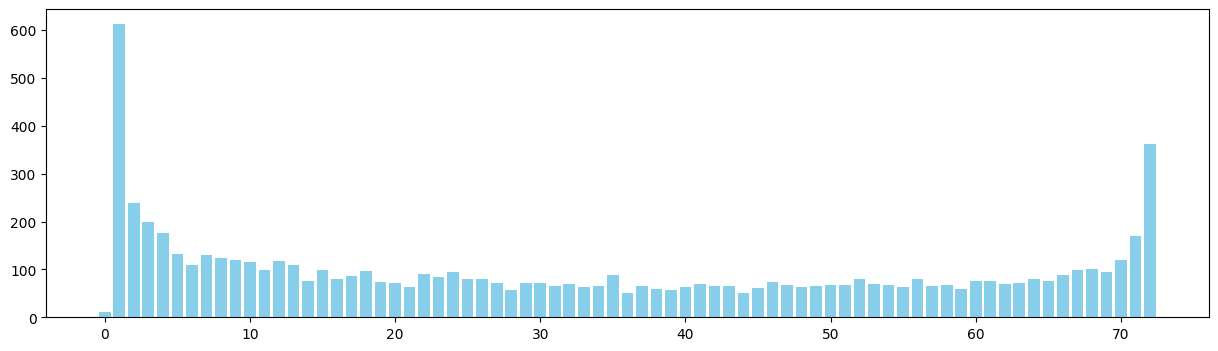

In [ ]:
# Calculate value counts and sort by counts in descending order
value_counts = df['Tenure Months'].value_counts().reset_index()
value_counts.columns = ['Tenure Months', 'Count']
sorted_value_counts = value_counts.sort_values(by='Tenure Months', ascending=False)


# Create a bar chart
plt.figure(figsize=(15, 4))
plt.bar(sorted_value_counts['Tenure Months'], sorted_value_counts['Count'], color='skyblue')

# Show the chart
plt.show()

<Axes: >

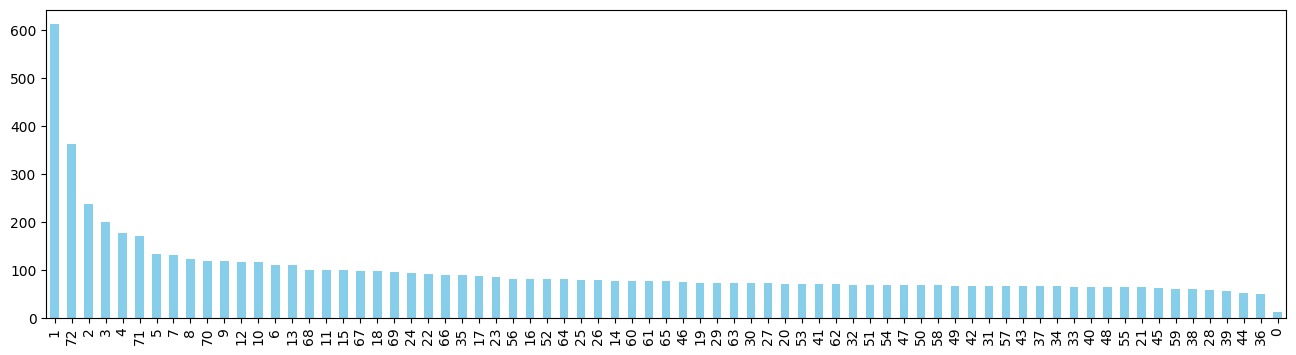

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Tenure Months'].value_counts()

# Create a bar chart
plt.figure(figsize=(16, 4))
value_counts.plot(kind='bar', color='skyblue')

<Axes: xlabel='Tenure Months'>

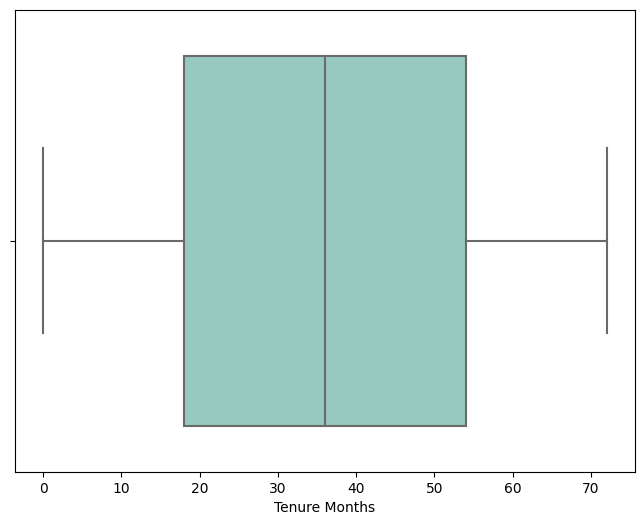

In [ ]:
# Get the value counts and convert them to a DataFrame
value_counts = df['Tenure Months'].value_counts().reset_index()
value_counts.columns = ['Tenure Months', 'Count']

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tenure Months', data=value_counts, palette='Set3')

### 3. **Location**
(Customer’s residence - City)

In [ ]:
df['Location'].value_counts()

Jakarta    5031
Bandung    2012
Name: Location, dtype: int64

<Axes: ylabel='Location'>

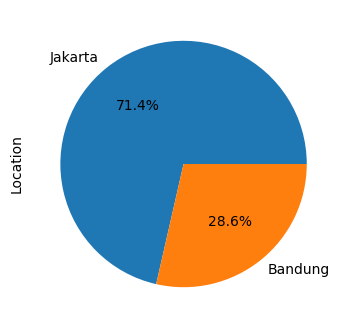

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Location'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 4. **Device Class**
(Device classification)

In [ ]:
df['Device Class'].value_counts()

High End    3096
Mid End     2421
Low End     1526
Name: Device Class, dtype: int64

<Axes: ylabel='Device Class'>

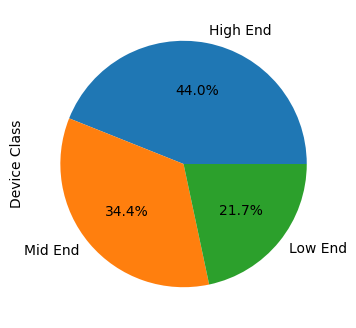

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Device Class'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 5. **Games Product**
(Whether the customer uses the internet service for games product)

In [ ]:
df['Games Product'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: Games Product, dtype: int64

<Axes: ylabel='Games Product'>

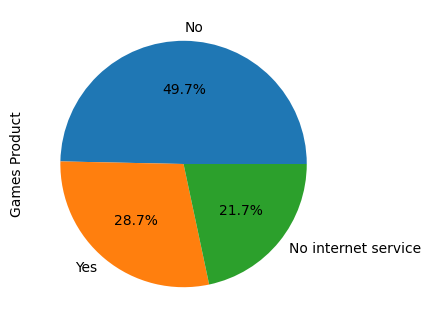

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Games Product'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 6. **Music Product**
(Whether the customer uses the internet service for music product)

In [ ]:
df['Music Product'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: Music Product, dtype: int64

<Axes: ylabel='Music Product'>

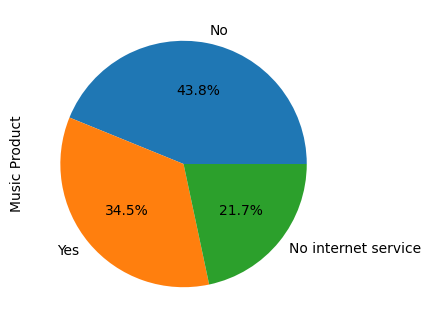

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Music Product'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 7. **Education Product**
(Whether the customer uses the internet service for education product)

In [ ]:
df['Education Product'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: Education Product, dtype: int64

<Axes: ylabel='Education Product'>

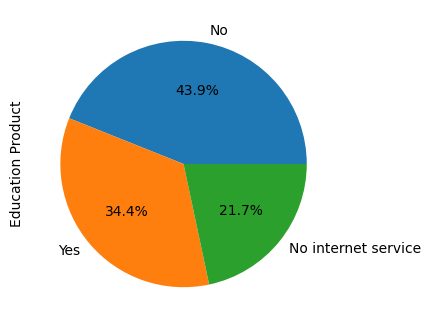

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Education Product'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 8. **Call Center**
(Whether the customer uses the call center service)

In [ ]:
df['Call Center'].value_counts()

No     4999
Yes    2044
Name: Call Center, dtype: int64

<Axes: ylabel='Call Center'>

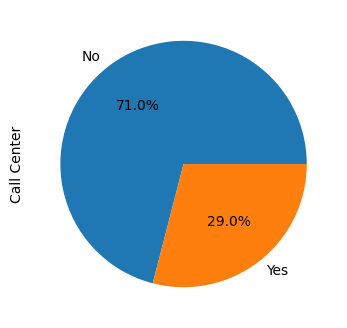

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Call Center'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 9. **Video Product**
(Whether the customer uses video product service)

In [ ]:
df['Video Product'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: Video Product, dtype: int64

<Axes: ylabel='Video Product'>

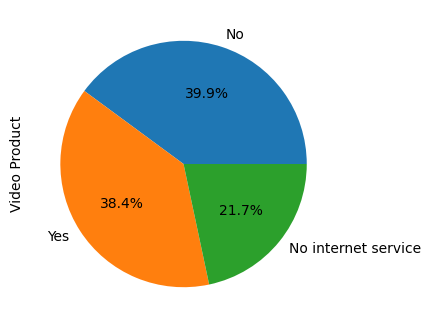

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Video Product'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 10. **Use MyApp**
(Whether the customer uses MyApp service)*

In [ ]:
df['Use MyApp'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: Use MyApp, dtype: int64

<Axes: ylabel='Use MyApp'>

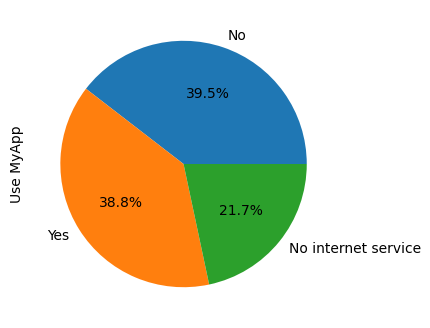

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Use MyApp'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 11. **Payment Method**
 (The method used for paying the bill)

In [ ]:
df['Payment Method'].value_counts()

Pulsa             2365
Digital Wallet    1612
Debit             1544
Credit            1522
Name: Payment Method, dtype: int64

<Axes: ylabel='Payment Method'>

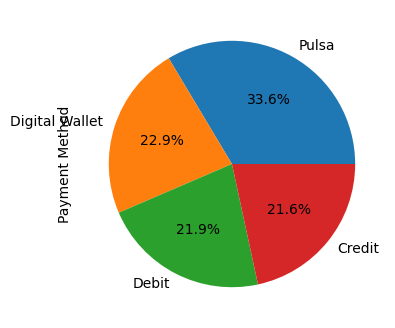

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Payment Method'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 12. **Monthly Purchase**
(Total customer’s monthly spent for all services with the unit of thousands of IDR)

In [ ]:
df['Monthly Purchase (Thou. IDR)'].value_counts()

26.065     61
25.805     45
25.935     44
25.870     44
25.545     43
           ..
146.315     1
152.295     1
38.220      1
87.620      1
102.310     1
Name: Monthly Purchase (Thou. IDR), Length: 1585, dtype: int64

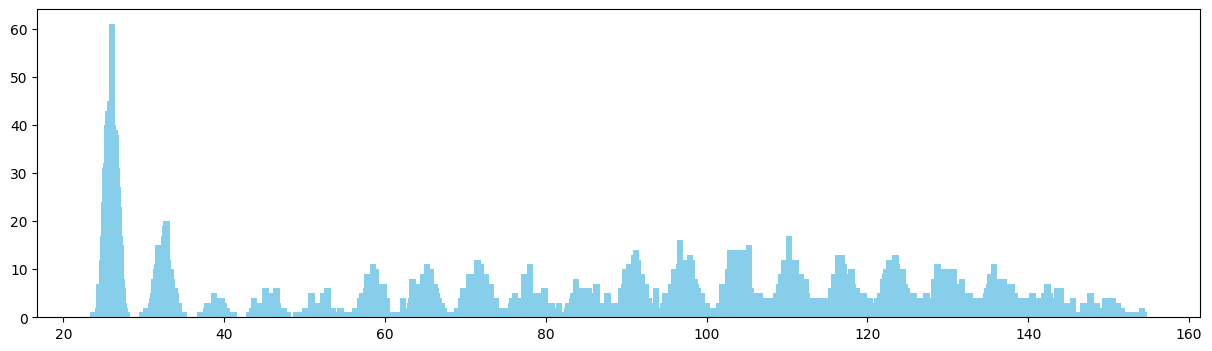

In [ ]:
# Calculate value counts and sort by counts in descending order
value_counts = df['Monthly Purchase (Thou. IDR)'].value_counts().reset_index()
value_counts.columns = ['Monthly Purchase (Thou. IDR)', 'Count']
sorted_value_counts = value_counts.sort_values(by='Monthly Purchase (Thou. IDR)', ascending=False)


# Create a bar chart
plt.figure(figsize=(15, 4))
plt.bar(sorted_value_counts['Monthly Purchase (Thou. IDR)'], sorted_value_counts['Count'], color='skyblue')

# Show the chart
plt.show()

### 13. **Churn Label**
(Whether the customer left the company within a time period)

In [ ]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

<Axes: ylabel='Churn Label'>

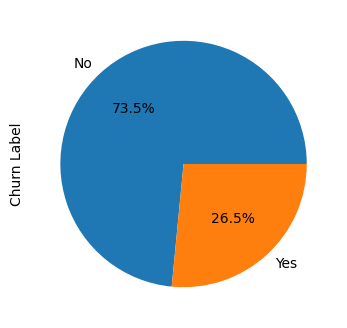

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Churn Label'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 14. **Longitude**
(Customer’s residence - Longitude)

In [ ]:
df['Longitude'].value_counts()

106.816666    5031
107.609810    2012
Name: Longitude, dtype: int64

<Axes: ylabel='Longitude'>

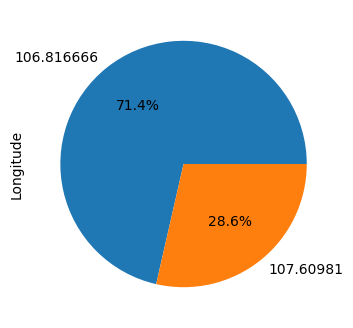

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Longitude'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

### 15. **Latitude**
(Customer’s residence - Latitude)

In [ ]:
df['Latitude'].value_counts()

-6.200000    5031
-6.914744    2012
Name: Latitude, dtype: int64

<Axes: ylabel='Latitude'>

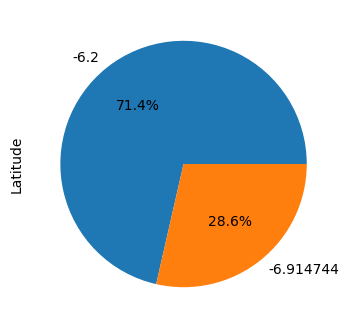

In [ ]:
# Get unique values and their counts from the 'Category' column
value_counts = df['Latitude'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
value_counts.plot(kind='pie',autopct='%1.1f%%')

In [ ]:
df[(df['Latitude'] == -6.200000) & (df['Longitude'] == 106.816666)]

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [ ]:
df[(df['Latitude'] == -6.200000) & (df['Longitude'] == 107.609810)]

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)


In [ ]:
df[(df['Latitude'] == -6.914744) & (df['Longitude'] == 107.609810)]

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
37,37,20,Bandung,High End,Yes,No,No,No,No,No,Pulsa,107.120,Yes,107.60981,-6.914744,7434.7
38,38,4,Bandung,High End,No,No,No,No,No,No,Debit,92.170,Yes,107.60981,-6.914744,5573.1
39,39,58,Bandung,Mid End,No,Yes,Yes,No,No,Yes,Pulsa,58.890,Yes,107.60981,-6.914744,7077.2
40,40,2,Bandung,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,135.720,Yes,107.60981,-6.914744,6097.0
41,41,53,Bandung,High End,No,No,Yes,No,Yes,Yes,Debit,123.305,Yes,107.60981,-6.914744,5626.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6951,6951,72,Bandung,High End,No,No,Yes,No,Yes,Yes,Pulsa,127.205,No,107.60981,-6.914744,5860.4
6952,6952,44,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,25.415,No,107.60981,-6.914744,7618.0
6953,6953,72,Bandung,High End,Yes,Yes,No,No,No,No,Debit,109.265,No,107.60981,-6.914744,7169.5
6954,6954,54,Bandung,High End,No,No,Yes,No,No,Yes,Credit,116.220,No,107.60981,-6.914744,7632.3


In [ ]:
df[(df['Latitude'] == -6.914744) & (df['Longitude'] == 106.816666)]

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)


### 16. **CLTV**
(Customer Lifetime Value with the unit of thousands of IDR -Calculated using company’s formulas)

(perkiraan jumlah pendapatan bersih yang dapat dihasilkan dari seorang pelanggan selama periode waktu tertentu di masa depan) - kata gpt wkwk

Banyak bgt kelompoknya, jadi gabisa divisualisasiin

In [ ]:
df['CLTV (Predicted Thou. IDR)'].value_counts()

7209.8    8
6163.3    7
7185.1    7
6619.6    7
6168.5    7
         ..
3073.2    1
3903.9    1
6864.0    1
4249.7    1
7218.9    1
Name: CLTV (Predicted Thou. IDR), Length: 3438, dtype: int64

In [ ]:
df['CLTV (Predicted Thou. IDR)'].value_counts().count

<bound method Series.count of 7209.8    8
6163.3    7
7185.1    7
6619.6    7
6168.5    7
         ..
3073.2    1
3903.9    1
6864.0    1
4249.7    1
7218.9    1
Name: CLTV (Predicted Thou. IDR), Length: 3438, dtype: int64>

In [ ]:
df['CLTV (Predicted Thou. IDR)'].describe()

count    7043.000000
mean     5720.384481
std      1537.974298
min      2603.900000
25%      4509.700000
50%      5885.100000
75%      6994.650000
max      8450.000000
Name: CLTV (Predicted Thou. IDR), dtype: float64

## Kesimpulan

* So, persentase untuk 'No internet Service" pada bagian *Games, Music, Education, Video Product dan Use MyApp* sama yaitu **21.7%** atau sekitar 1526/1527 orang
* Tenure Months, Churn Label keknya kolom **penting** yg bakal kepake
* Longitude dan Latitude cuma ada 2 jenis, keknya itu ngebedain Location **Jakarta** dan **Bandungnya** doang
* Monthly Purchase dan CLTV keknya **berhubungan** dan bakal kepake juga
* sisa Payment Method, Device Class, dan Call Center yang kek kolom buat **nice info** aja wkwkw


## Binary Data
  * Location : Jakarta, Bandung
  * Device Class : High, Mid, Low
  * Games, Music, Education, Video Product, Use MyApp : Yes, No, No Internet Sevice
  * Call Center : Yes, No
  * Payment Method : Pulsa, digital wallet, debit, credit  
  * Churn Label : Yes, No

## Drop Data
  * Latitude dan Longitude bisa di drop
    * Latitude = -6.914744 & Longitude = 107.609810 → Bandung \\
    * Latitude = -6.200000 & Longitude = 106.816666 → Jakarta
  * Customer ID → karena cuma buat customer identifier doang dan ga berpengaruh dalam model atau customer behavior


# EDA

In [ ]:
dfRaw = df.copy()

In [ ]:
df=dfRaw

In [ ]:
# drop columns
columns_to_drop = ['Customer ID', 'Latitude', 'Longitude']
df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.tail(5)

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,3630.9
7042,66,Jakarta,High End,Yes,No,Yes,Yes,Yes,Yes,Debit,137.345,No,6626.1


In [ ]:
df.columns

Index(['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase (Thou. IDR)',
       'Churn Label', 'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
# new function to count total product that the user use

product = [ 'Games Product', 'Music Product', 'Education Product', 'Video Product']

def count_yes_in_selected_columns(row):
    return sum([1 for col in product if row[col] == 'Yes'])

# Create a new column 'Total Products Used' based on the selected columns
df['Total Products'] = df.apply(count_yes_in_selected_columns, axis=1)

In [ ]:
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Churn,Music x Education,Total Products
0,2,Jakarta,2,2,Yes,No,0,0,0,0,70.005,4210.7,1,3,1
1,2,Jakarta,0,0,No,No,0,0,0,1,91.910,3511.3,1,0,0
2,8,Jakarta,0,0,No,Yes,0,2,2,1,129.545,6983.6,1,4,1
3,28,Jakarta,0,0,No,Yes,1,2,2,1,136.240,6503.9,1,4,1
4,49,Jakarta,0,0,Yes,Yes,0,2,2,0,134.810,6942.0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,1,1,No internet service,No internet service,0,1,1,0,27.495,6897.8,0,1,0
7039,24,Jakarta,2,2,No,Yes,1,2,2,0,110.240,2782.0,0,4,1
7040,72,Jakarta,0,0,Yes,Yes,0,2,2,0,134.160,7228.0,0,2,2
7041,11,Jakarta,2,2,No,No,0,0,0,1,38.480,3630.9,0,0,0


#### No internet connection in games, video, music, and education product

In [ ]:
for i in product:
  print(i)
  print(df[df[i]=='No internet service']['Device Class'].value_counts())
  print()

Games Product
Low End    1526
Name: Device Class, dtype: int64

Music Product
Low End    1526
Name: Device Class, dtype: int64

Education Product
Low End    1526
Name: Device Class, dtype: int64

Video Product
Low End    1526
Name: Device Class, dtype: int64



In [ ]:
df['Device Class'].value_counts()

High End    3096
Mid End     2421
Low End     1526
Name: Device Class, dtype: int64

#### "YES" and "NO" in games, video, music, and education product

In [ ]:
df[['Device Class','Total Products']].value_counts()

Device Class  Total Products
Low End       0                 1526
High End      2                  841
              1                  829
Mid End       1                  641
              2                  630
High End      3                  606
              0                  580
Mid End       3                  497
              0                  429
High End      4                  240
Mid End       4                  224
dtype: int64

In [ ]:
print('Mid')
print('<3',(len(df[(df['Device Class'] == 'Mid End') & (df['Total Products']<3)]))/2421*100)
print('>=3',(len(df[(df['Device Class'] == 'Mid End') & (df['Total Products']>=3)]))/2421*100)

print('High')
print('<3',(len(df[(df['Device Class'] == 'High End') & (df['Total Products']<3)]))/3096*100)
print('>=3',(len(df[(df['Device Class'] == 'High End') & (df['Total Products']>=3)])/3096*100))

Mid
<3 70.21891780256092
>=3 29.781082197439073
High
<3 72.67441860465115
>=3 27.325581395348834


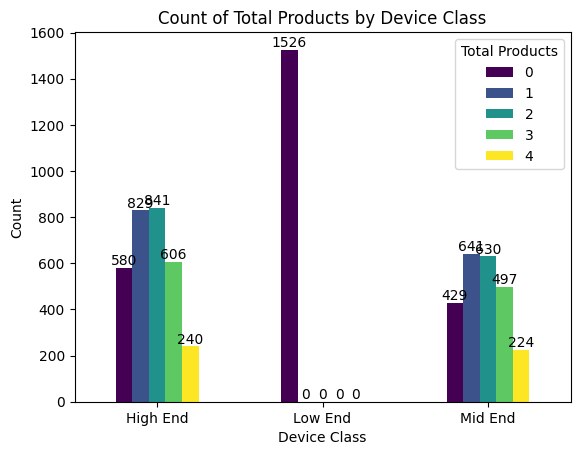

In [ ]:
# Group the data by 'Device Class' and 'Total Products' and count the occurrences
grouped = df.groupby(['Device Class', 'Total Products']).size().unstack(fill_value=0)

# Create a non-stacked bar chart
ax = grouped.plot(kind='bar', cmap='viridis')
plt.xlabel('Device Class')
plt.ylabel('Count')
plt.title('Count of Total Products by Device Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Display the exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()


## Insight

* Semua $\underline{Low}$ Device Class **Tidak** menggunakan product games, music, education dan video karena **No internet service** → kemungkinannya Low device class ga beli kuota untuk internet service dan cuma beli paketan nelpon atau SMS.

* Persentase banyak penggunaan product dari yg High dan Mid Hampir **sama persis**

## Churn Label

In [ ]:
churn_numeric = {'Yes':1, 'No':0}
df['Churn']= df['Churn Label']
df.Churn.replace(churn_numeric, inplace=True)
df = df.drop('Churn Label', axis=1)

In [ ]:
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Total Products,Churn
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,4210.7,2,1
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,3511.3,0,1
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,6983.6,2,1
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,6503.9,2,1
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,6942.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,6897.8,0,0
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,2782.0,3,0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,7228.0,3,0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,3630.9,1,0


In [ ]:
df[['Device Class','Churn']].groupby(['Device Class']).mean()

,Churn
Device Class,
High End,0.418928
Low End,0.074050
Mid End,0.189591


In [ ]:
(df[['Games Product','Churn']].groupby(['Games Product']).mean())

,Churn
Games Product,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [ ]:
(df[['Music Product','Churn']].groupby(['Music Product']).mean())

,Churn
Music Product,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [ ]:
(df[['Video Product','Churn']].groupby(['Video Product']).mean())

,Churn
Video Product,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [ ]:
(df[['Education Product','Churn']].groupby(['Education Product']).mean())

,Churn
Education Product,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [ ]:
(df[['Total Products','Churn']].groupby(['Total Products']).mean())

,Churn
Total Products,
0,0.247732
1,0.400000
2,0.276003
3,0.191296
4,0.077586


In [ ]:
(df[['Location','Churn']].groupby(['Location']).mean())

,Churn
Location,
Bandung,0.271372
Jakarta,0.262970


In [ ]:
(df[['Call Center','Churn']].groupby(['Call Center']).mean())

,Churn
Call Center,
No,0.311862
Yes,0.151663


In [ ]:
(df[['Use MyApp','Churn']].groupby(['Use MyApp']).mean())

,Churn
Use MyApp,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [ ]:
(df[['Payment Method','Churn']].groupby(['Payment Method']).mean())

,Churn
Payment Method,
Credit,0.152431
Debit,0.167098
Digital Wallet,0.191067
Pulsa,0.452854


* Keknya untuk product video, education, dan music bisa digabungin setelah ngeliat churn mereka gabeda jauh antar satu sama lain
    * no internet service → tidak churn
    * Yes/No → kemungkinan untuk churn-nya sama

* Mungkin untuk product bisa make features baru (Total Product yang digunakan)
* Device Class High>Mid>Low lebih besar kemungkinan untuk churn
* Location bisa di drop pas build model karena kemungkinan churn mereka sama (tidak ada pengaruh)
* Call Center : No > Yes
* Use MyApp mirip sama penggunaan product (keknya bisa didrop)
* Payment Method : Pulsa>>> Digital Wallet> Debit> Credit


So far, yang besar kemungkinan untuk Churn adalah User dengan device class High End, dan menggunakan Pulsa sebagai payment method

## Visualisasi Categorical Features

<Axes: xlabel='Payment Method', ylabel='count'>

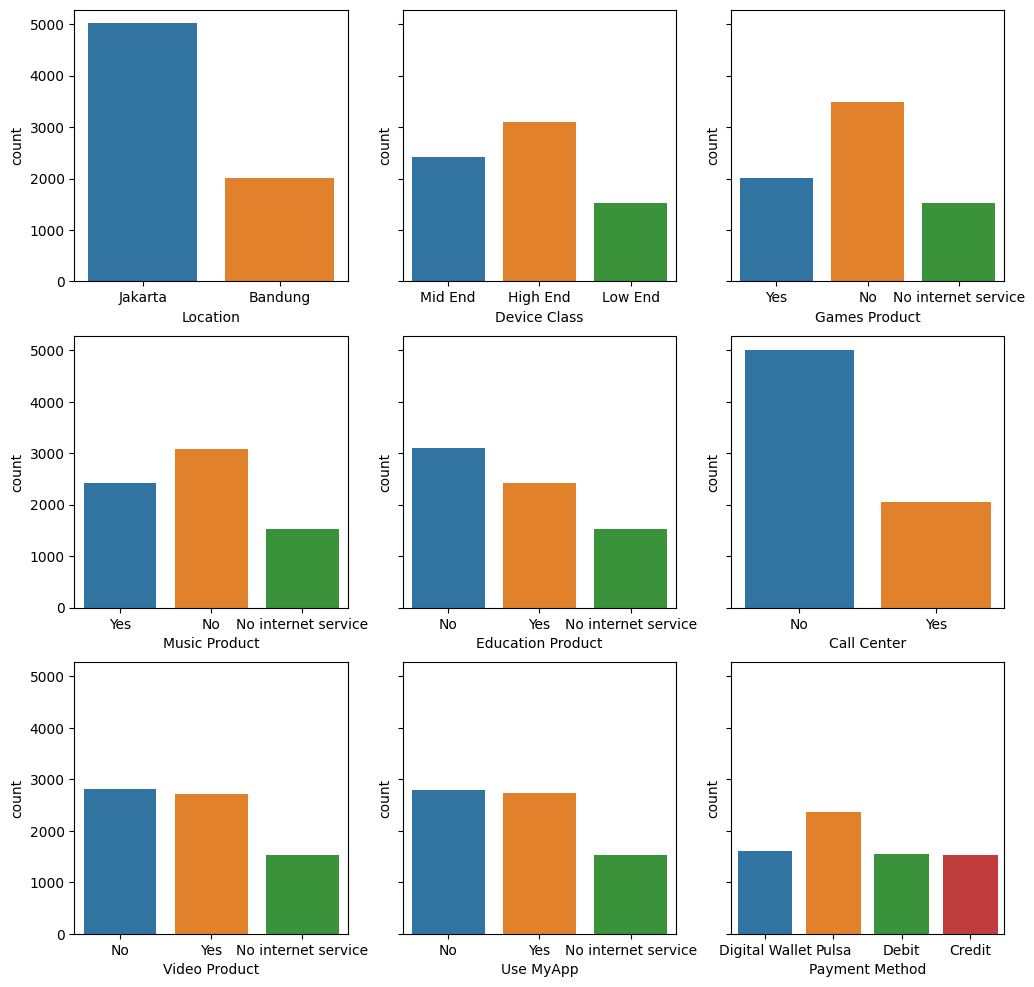

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharey=True)

sns.countplot(x="Location", data=df, ax=axes[0,0])
sns.countplot(x="Device Class", data=df, ax=axes[0,1])
sns.countplot(x="Games Product", data=df, ax=axes[0,2])
sns.countplot(x="Music Product", data=df, ax=axes[1,0])
sns.countplot(x="Education Product", data=df, ax=axes[1,1])
sns.countplot(x="Call Center", data=df, ax=axes[1,2])
sns.countplot(x="Video Product", data=df, ax=axes[2,0])
sns.countplot(x="Use MyApp", data=df, ax=axes[2,1])
sns.countplot(x="Payment Method", data=df, ax=axes[2,2])

## Korelasi

In [ ]:
df.corr()

<ipython-input-184-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Total Products,Churn
Tenure Months,1.000000,0.247900,0.396406,0.486533,-0.352229
Monthly Purchase (Thou. IDR),0.247900,1.000000,0.098693,0.683013,0.193356
CLTV (Predicted Thou. IDR),0.396406,0.098693,1.000000,0.183755,-0.127463
Total Products,0.486533,0.683013,0.183755,1.000000,-0.090998
Churn,-0.352229,0.193356,-0.127463,-0.090998,1.000000


* **Tenure Months  ~ Total Product > CLTV > Monthly Purchase** ~ 1/Churn
* Monthly Purchase ~ Total Product > Tenure Months **bold text** (0.2479) > Churn (0.193) > CLTV (0.09)
* **CLTV ~ Tenure Months** > Total Product (0.183)
* **Total Products ~ Monthly Purchase > Tenure Months** > CLTV
* **Churn ~ 1/Tenure Months**


Intepretasi
* Semakin lama tenure monthsnya → kemungkinan churn <<
* Tenure Months >> → Total Products>> , CLTV>>
* Total Products >> → Monthly Purchase>>

# Descriptive Statistics

In [ ]:
# drop columns
columns_to_drop = ['Customer ID', 'Latitude', 'Longitude']
df = df.drop(columns_to_drop, axis=1)

### Boxplot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration (replace with your dataset)

def boxplot(data,xlabel,title):
  # Create a figure and axis
  fig, ax = plt.subplots()

  # Define the color palette
  colors = ['#272643', '#272643', '#e3f6f5', '#e3f6f5', '#2c698d']

  # Set the background color to white
  ax.set_facecolor('#FFFFFF')

  # Create a customized boxplot using the color palette
  boxprops = dict(linestyle='-', linewidth=2, color=colors[0], facecolor=colors[2])
  whiskerprops = dict(linestyle='--', linewidth=1, color=colors[0])
  medianprops = dict(linestyle='-', linewidth=2, color=colors[4])
  flierprops = dict(marker='o', markerfacecolor=colors[4], markersize=5, linestyle='none')

  boxplot = ax.boxplot(data, vert=False, widths=0.6, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, flierprops=flierprops)

  # Customize the grid lines
  ax.grid(axis='x', linestyle='--', alpha=0.7)

  # Add labels and a title
  ax.set_xlabel(xlabel)
  ax.set_title(title)

  # Add a legend for the box colors
  legend_elements = [plt.Rectangle((0, 0), 1, 1, fc=colors[2], edgecolor=colors[0], linewidth=2, label='Box'),
                    plt.Line2D([0], [0], color=colors[4], linewidth=2, label='Median'),
                    plt.Line2D([0], [0], color=colors[0], linestyle='--', linewidth=1, label='Whiskers'),
                    plt.Line2D([0], [0], marker='o', color='w', label='Outliers', markerfacecolor=colors[4], markersize=5)]

  ax.legend(handles=legend_elements, loc='upper right')

  # Show the boxplot
  plt.show()


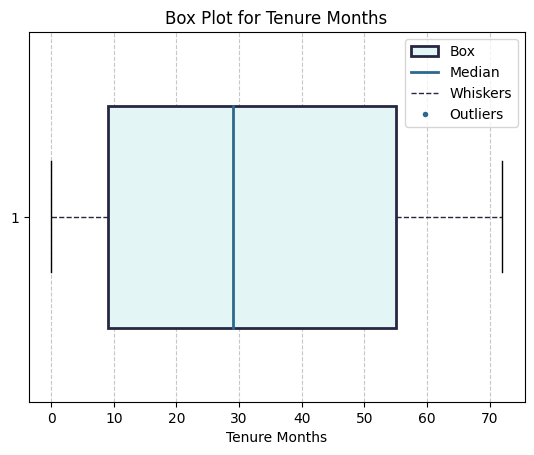

In [ ]:
boxplot(df['Tenure Months'],'Tenure Months', 'Box Plot for Tenure Months')

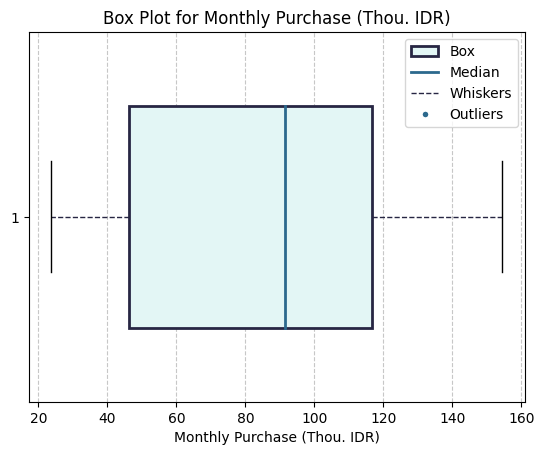

In [ ]:
boxplot(df['Monthly Purchase (Thou. IDR)'],'Monthly Purchase (Thou. IDR)', 'Box Plot for Monthly Purchase (Thou. IDR)')

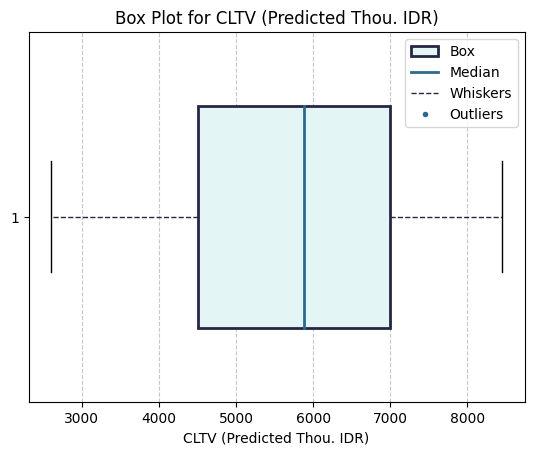

In [ ]:
boxplot(df['CLTV (Predicted Thou. IDR)'],'CLTV (Predicted Thou. IDR)', 'Box Plot for CLTV (Predicted Thou. IDR)')

### Distribution

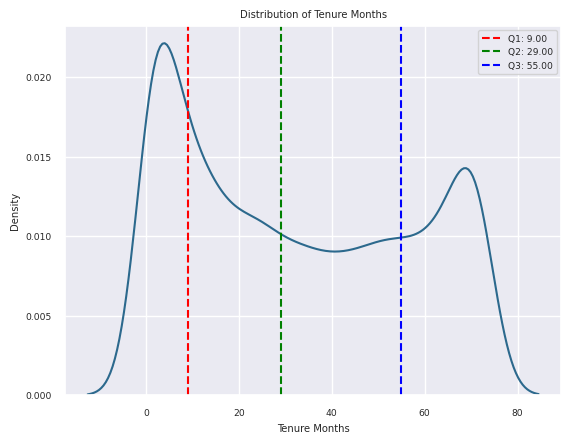

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot
fig = sns.kdeplot(df['Tenure Months'], color='#2c698d')
fig.set_title('Distribution of Tenure Months')

# Calculate the quartiles
q1 = df['Tenure Months'].quantile(0.25)
q2 = df['Tenure Months'].median()
q3 = df['Tenure Months'].quantile(0.75)

# Add vertical lines for quartiles
plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Q2: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Text(0.5, 1.0, 'Distribution of Tenure Months')

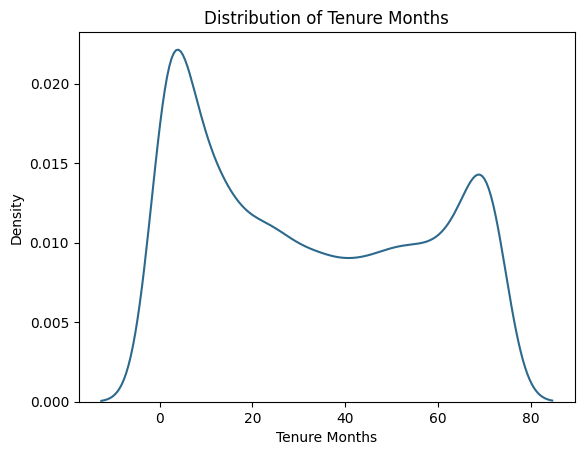

In [ ]:
fig = sns.kdeplot(df['Tenure Months'], color='#2c698d')
fig.set_title('Distribution of Tenure Months')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def Histogram(data,xlabel):
  # Create a figure and axis
  fig, ax = plt.subplots()

  # Set the background color to white
  ax.set_facecolor('#FFFFFF')

  # Define your colors
  colors = ['#272643', '#ffffff', '#e3f6f5', '#bae8e8', '#2c698d']

  # Assuming 'data' is your dataset
  sns.histplot(data, kde=True, bins=20, color=colors[4], edgecolor=colors[0], alpha=0.7)


  # Add labels and a title
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Frequency')
  ax.set_title('Histogram Plot')

  # Add a legend
  plt.legend()

  # Show the combined plot
  plt.show()

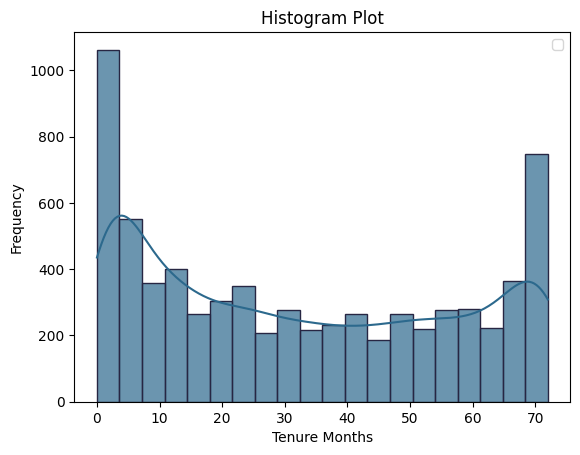

In [ ]:
Histogram(df['Tenure Months'], 'Tenure Months')

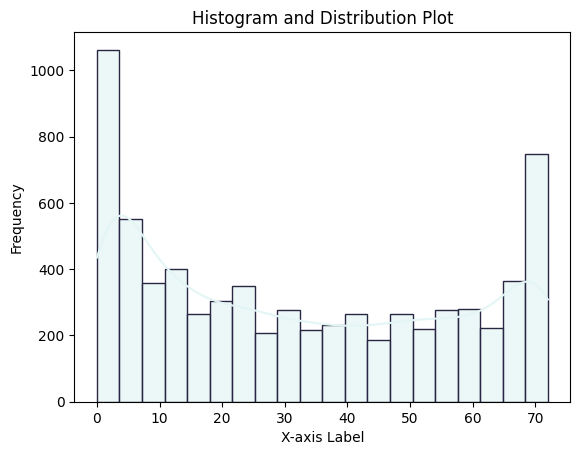

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your data)
data = df['Tenure Months']

# Create a figure and axis
fig, ax = plt.subplots()

# Define the color palette
colors = ['#272643', '#272643', '#e3f6f5', '#e3f6f5', '#2c698d']

# Set the background color to white
ax.set_facecolor('#FFFFFF')

# Create a histogram to visualize the data distribution
sns.histplot(data, bins=20, kde=True, color=colors[2], edgecolor=colors[0], alpha=0.7)

# Add labels and a title
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Frequency')
ax.set_title('Histogram and Distribution Plot')

# Show the combined plot
plt.show()

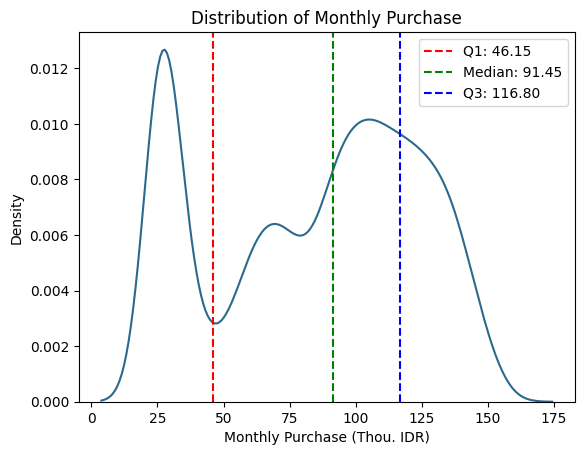

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot
fig = sns.kdeplot(df['Monthly Purchase (Thou. IDR)'], color='#2c698d')
fig.set_title('Distribution of Monthly Purchase')

# Calculate the quartiles
q1 = df['Monthly Purchase (Thou. IDR)'].quantile(0.25)
median = df['Monthly Purchase (Thou. IDR)'].median()
q3 = df['Monthly Purchase (Thou. IDR)'].quantile(0.75)

# Add vertical lines for quartiles
plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


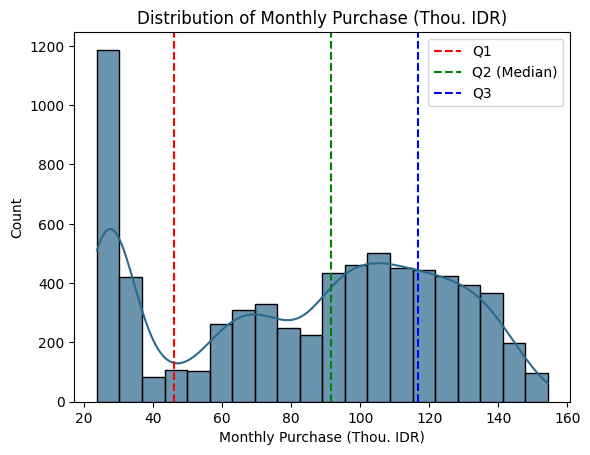

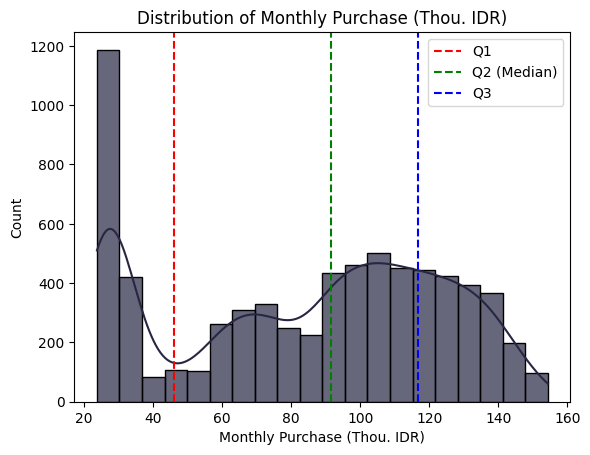

In [ ]:
# Set custom color palette
custom_palette  = ['#2c698d','#272643', '#ffffff', '#e3f6f5', '#bae8e8' ]
sns.set_palette(custom_palette)

# Plot the distribution of 'Tenure Months'
sns.histplot(df['Monthly Purchase (Thou. IDR)'], bins = 20, kde=True, color=custom_palette[0], alpha = 0.7)
plt.title("Distribution of Monthly Purchase (Thou. IDR)", size=12)
plt.xlabel("Monthly Purchase (Thou. IDR)")
plt.ylabel("Count")

# Calculate and plot Q1, Q2 (median), and Q3 lines
q1 = df['Monthly Purchase (Thou. IDR)'].quantile(0.25)
q2 = df['Monthly Purchase (Thou. IDR)'].quantile(0.50)  # Median
q3 = df['Monthly Purchase (Thou. IDR)'].quantile(0.75)

plt.axvline(q1, color='red', linestyle='--', label='Q1')  # Q1 line
plt.axvline(q2, color='green', linestyle='--', label='Q2 (Median)')  # Median line
plt.axvline(q3, color='blue', linestyle='--', label='Q3')  # Q3 line
plt.legend()
plt.show()# Set custom color palette
custom_palette  = ['#272643', '#ffffff', '#e3f6f5', '#bae8e8', '#2c698d']
sns.set_palette(custom_palette)

# Plot the distribution of 'Tenure Months'
sns.histplot(df['Monthly Purchase (Thou. IDR)'], bins = 20, kde=True, color=custom_palette[0], alpha = 0.7)
plt.title("Distribution of Monthly Purchase (Thou. IDR)", size=12)
plt.xlabel("Monthly Purchase (Thou. IDR)")
plt.ylabel("Count")

# Calculate and plot Q1, Q2 (median), and Q3 lines
q1 = df['Monthly Purchase (Thou. IDR)'].quantile(0.25)
q2 = df['Monthly Purchase (Thou. IDR)'].quantile(0.50)  # Median
q3 = df['Monthly Purchase (Thou. IDR)'].quantile(0.75)

plt.axvline(q1, color='red', linestyle='--', label='Q1')  # Q1 line
plt.axvline(q2, color='green', linestyle='--', label='Q2 (Median)')  # Median line
plt.axvline(q3, color='blue', linestyle='--', label='Q3')  # Q3 line
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase (Thou. IDR)',
       'Churn Label', 'CLTV (Predicted Thou. IDR)'],
      dtype='object')

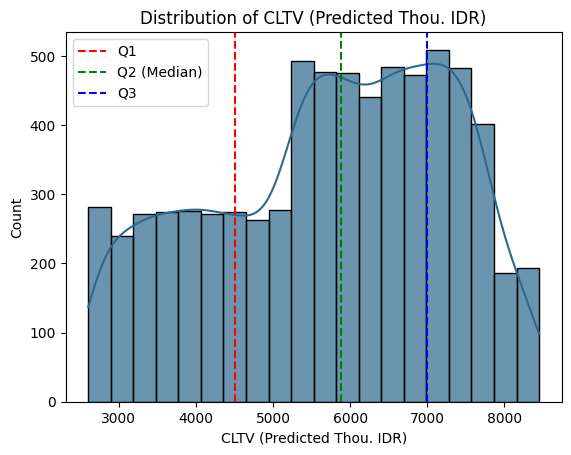

In [ ]:
# Set custom color palette
custom_palette  = ['#2c698d','#272643', '#ffffff', '#e3f6f5', '#bae8e8' ]
sns.set_palette(custom_palette)

# Plot the distribution of 'Tenure Months'
sns.histplot(df['CLTV (Predicted Thou. IDR)'], bins = 20, kde=True, color=custom_palette[0], alpha = 0.7)
plt.title("Distribution of CLTV (Predicted Thou. IDR)", size=12)
plt.xlabel("CLTV (Predicted Thou. IDR)")
plt.ylabel("Count")

# Calculate and plot Q1, Q2 (median), and Q3 lines
q1 = df['CLTV (Predicted Thou. IDR)'].quantile(0.25)
q2 = df['CLTV (Predicted Thou. IDR)'].quantile(0.50)  # Median
q3 = df['CLTV (Predicted Thou. IDR)'].quantile(0.75)

plt.axvline(q1, color='red', linestyle='--', label='Q1')  # Q1 line
plt.axvline(q2, color='green', linestyle='--', label='Q2 (Median)')  # Median line
plt.axvline(q3, color='blue', linestyle='--', label='Q3')  # Q3 line
plt.legend()
plt.show()# Set custom color palette

Text(0.5, 1.0, 'Distribution of Monthly Purchase')

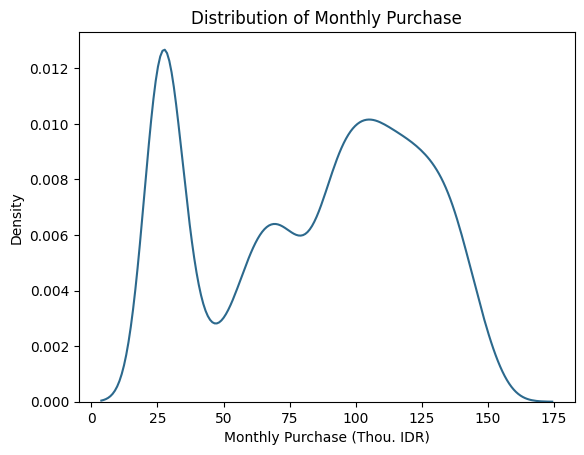

In [ ]:
fig = sns.kdeplot(df['Monthly Purchase (Thou. IDR)'], color='#2c698d')
fig.set_title('Distribution of Monthly Purchase')

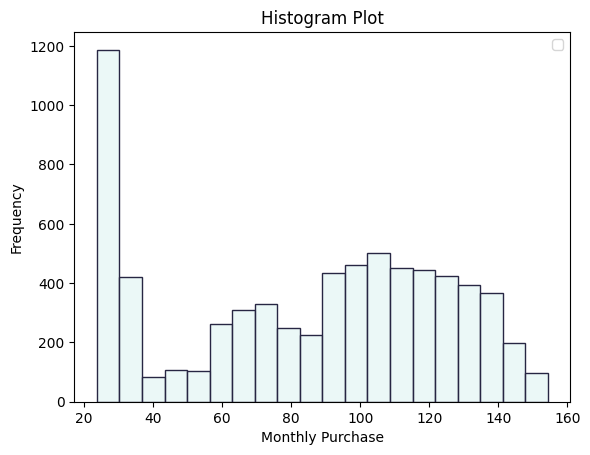

In [ ]:
Histogram(df['Monthly Purchase (Thou. IDR)'],'Monthly Purchase')

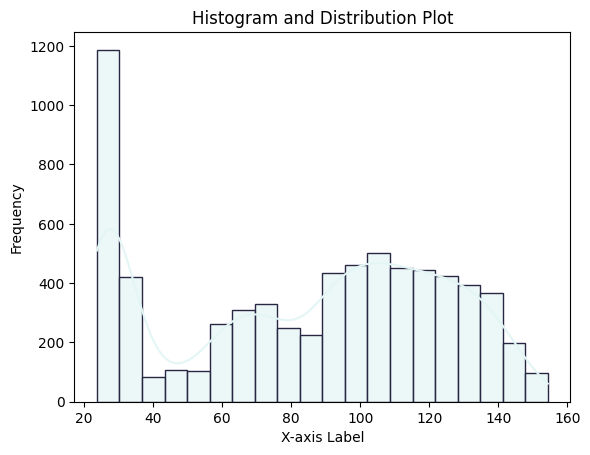

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your data)
data = df['Monthly Purchase (Thou. IDR)']

# Create a figure and axis
fig, ax = plt.subplots()

# Define the color palette
colors = ['#272643', '#272643', '#e3f6f5', '#e3f6f5', '#2c698d']

# Set the background color to white
ax.set_facecolor('#FFFFFF')

# Create a histogram to visualize the data distribution
sns.histplot(data, bins=20, kde=True, color=colors[2], edgecolor=colors[0], alpha=0.7)

# Add labels and a title
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Frequency')
ax.set_title('Histogram and Distribution Plot')

# Show the combined plot
plt.show()

Text(0.5, 1.0, 'Distribution of CLTV')

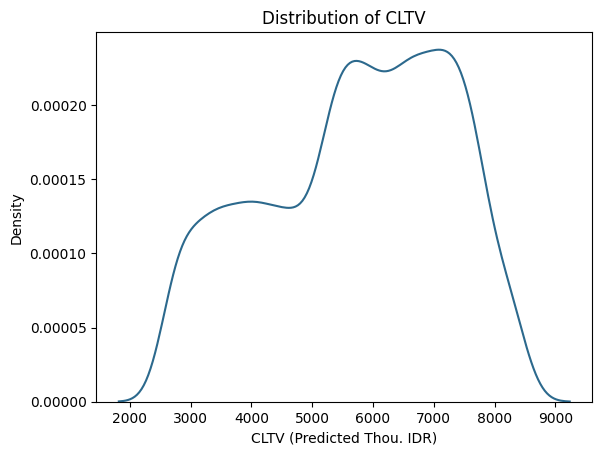

In [ ]:
fig = sns.kdeplot(df['CLTV (Predicted Thou. IDR)'], color='#2c698d')
fig.set_title('Distribution of CLTV')

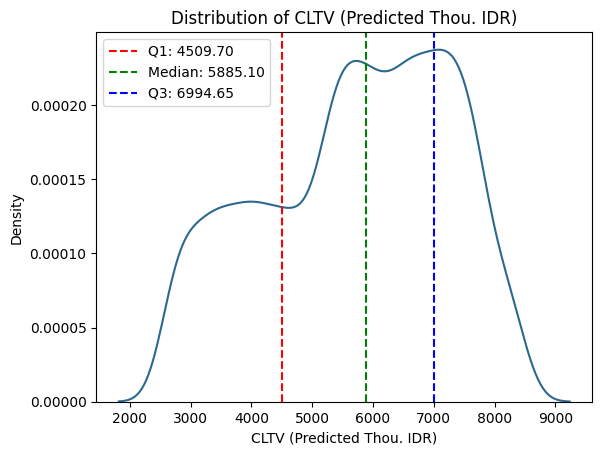

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot
fig = sns.kdeplot(df['CLTV (Predicted Thou. IDR)'], color='#2c698d')
fig.set_title('Distribution of CLTV (Predicted Thou. IDR)')

# Calculate the quartiles
q1 = df['CLTV (Predicted Thou. IDR)'].quantile(0.25)
median = df['CLTV (Predicted Thou. IDR)'].median()
q3 = df['CLTV (Predicted Thou. IDR)'].quantile(0.75)

# Add vertical lines for quartiles
plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


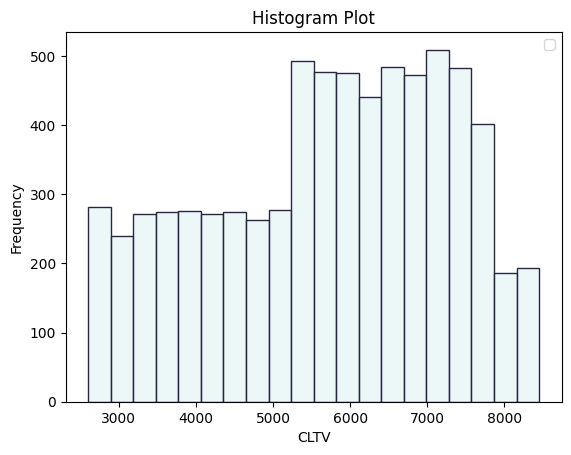

In [ ]:
Histogram(df['CLTV (Predicted Thou. IDR)'],'CLTV')

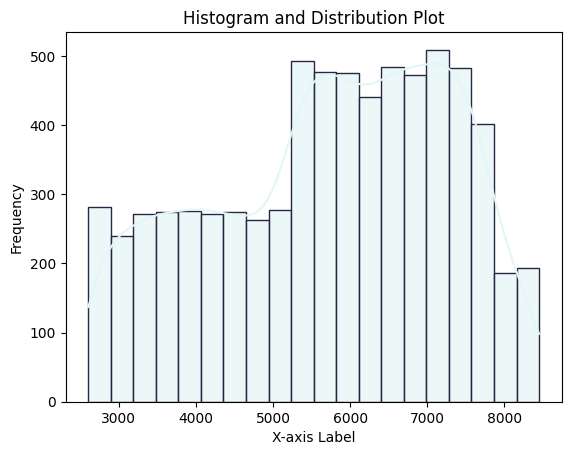

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your data)
data = df['CLTV (Predicted Thou. IDR)']

# Create a figure and axis
fig, ax = plt.subplots()

# Define the color palette
colors = ['#272643', '#272643', '#e3f6f5', '#e3f6f5', '#2c698d']

# Set the background color to white
ax.set_facecolor('#FFFFFF')

# Create a histogram to visualize the data distribution
sns.histplot(data, bins=20, kde=True, color=colors[2], edgecolor=colors[0], alpha=0.7)

# Add labels and a title
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Frequency')
ax.set_title('Histogram and Distribution Plot')

# Show the combined plot
plt.show()

### Bar Chart categorical features

## Plot Distribution

In [ ]:
def DC(feature):
  # Custom color palette
  custom_palette = ['#2c698d', '#bae8e8', '#e3f6f5']

  # Set the Seaborn style with a white background and grid lines
  sns.set(style="whitegrid")

  # Example using Seaborn
  # Replace 'categorical_feature' with the name of the categorical feature you want to visualize
  sns.countplot(x="Device Class", hue=feature, data=df, palette=custom_palette)
  plt.title(feature+ " Distribution by Device Class")

  # Set x-axis labels to be displayed horizontally
  plt.xticks(rotation=0)

  plt.show()

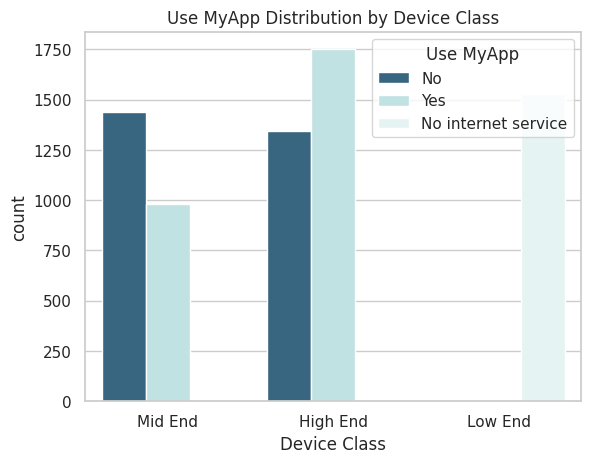

In [ ]:
DC('Use MyApp')

In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom color palette
custom_palette = {'Yes': '#2c698d', 'No': '#bae8e8', 'No internet service': '#e3f6f5'}

def DC(feature):
  # Set the order of the legend labels
  hue_order = ['Yes', 'No', 'No internet service']

  # Set the Seaborn style with a white background and grid lines
  sns.set(style="whitegrid")

  # Example using Seaborn
  sns.countplot(x="Device Class", hue=feature, data=df, palette=custom_palette, hue_order=hue_order)
  plt.title(feature + " Distribution by Device Class")

  # Set x-axis labels to be displayed horizontally
  plt.xticks(rotation=0)

  plt.show()

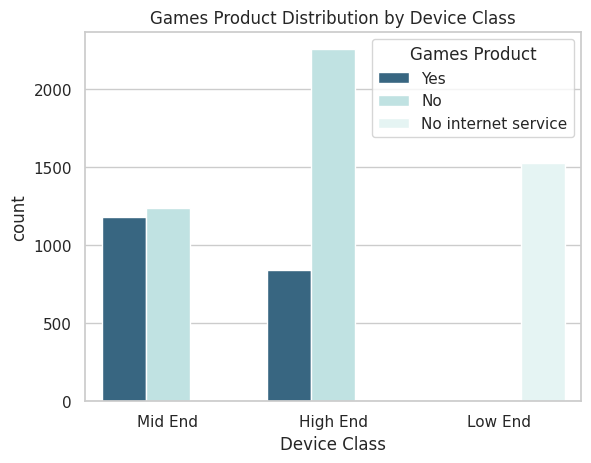

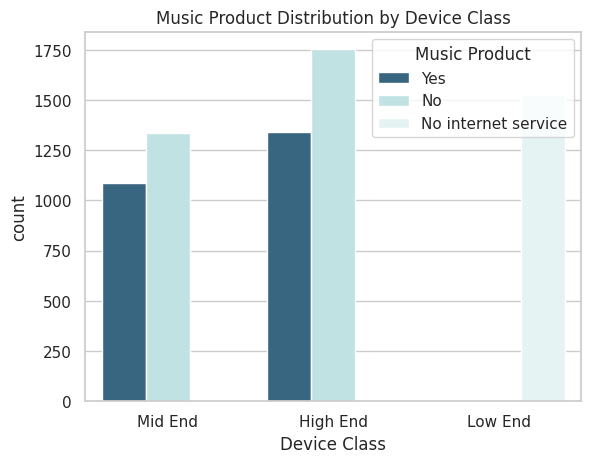

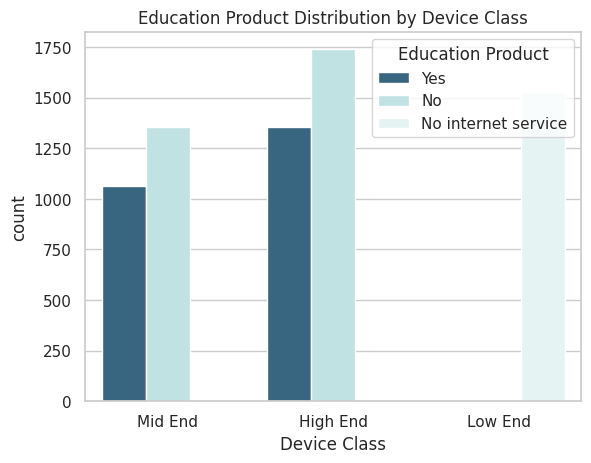

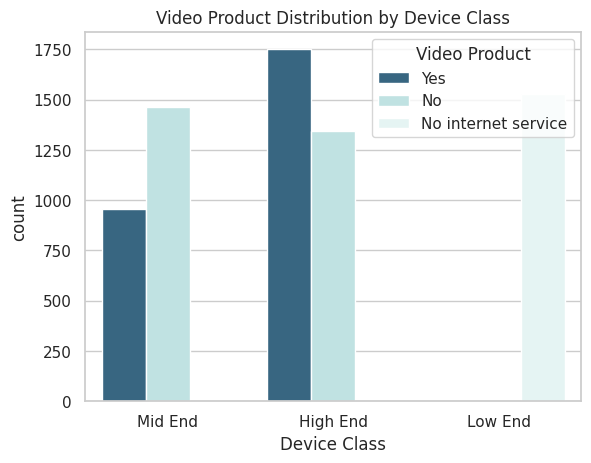

In [ ]:
feature= ['Games Product', 'Music Product', 'Education Product','Video Product']

for i in feature:
  DC(i)

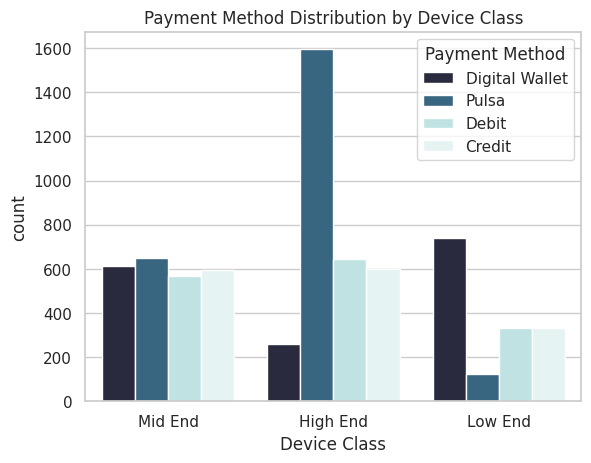

In [ ]:
# Custom color palette
custom_palette = ['#272643','#2c698d', '#bae8e8', '#e3f6f5']

feature='Payment Method'
# Set the Seaborn style with a white background and grid lines
sns.set(style="whitegrid")

# Example using Seaborn
# Replace 'categorical_feature' with the name of the categorical feature you want to visualize
sns.countplot(x="Device Class", hue=feature, data=df, palette=custom_palette)
plt.title(feature+ " Distribution by Device Class")

# Set x-axis labels to be displayed horizontally
plt.xticks(rotation=0)

plt.show()

In [ ]:
feature= ['Games Product', 'Music Product', 'Education Product','Video Product']

for i in feature:
  df.loc[df[i] != 'Yes', i] = 'No'
  df[i].unique()

In [ ]:
feature_numeric = {'Yes':1, 'No':0}

feature= ['Games Product', 'Music Product', 'Education Product','Video Product']

for i in feature:
  df[i].replace(feature_numeric, inplace=True)

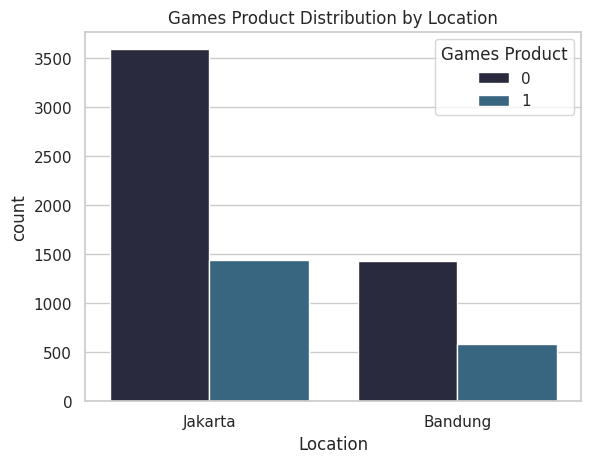

In [ ]:
feature = 'Games Product'
# Custom color palette
custom_palette = ['#272643','#2c698d', '#bae8e8', '#e3f6f5']

# Set the Seaborn style with a white background and grid lines
sns.set(style="whitegrid")

# Example using Seaborn
# Replace 'categorical_feature' with the name of the categorical feature you want to visualize
sns.countplot(x="Location", hue=feature, data=df, palette=custom_palette)
plt.title(feature+ " Distribution by Location")

# Set x-axis labels to be displayed horizontally
plt.xticks(rotation=0)

plt.show()

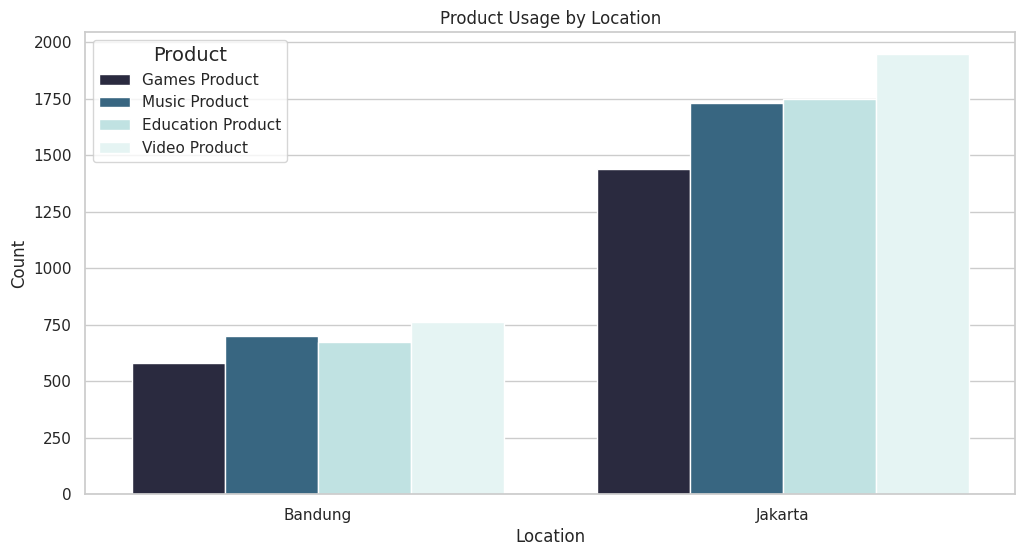

In [ ]:
# Define your custom color palette
custom_palette = ['#272643', '#2c698d', '#bae8e8', '#e3f6f5']

# Assuming 'df' is your DataFrame
# Group the data by 'Location' and sum the product columns
location_product_sum = df.groupby('Location')[['Games Product', 'Music Product', 'Education Product', 'Video Product']].sum()

# Reset the index to make 'Location' a regular column
location_product_sum.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for plotting
location_product_melted = location_product_sum.melt(id_vars='Location', var_name='Product', value_name='Usage')

# Create a bar plot with the custom color palette
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(data=location_product_melted, x='Location', y='Usage', hue='Product', palette=custom_palette)
plt.title('Product Usage by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set x-axis labels to be displayed horizontally
plt.xticks(rotation=0)

plt.legend(title='Product', title_fontsize='14')

plt.show()


In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

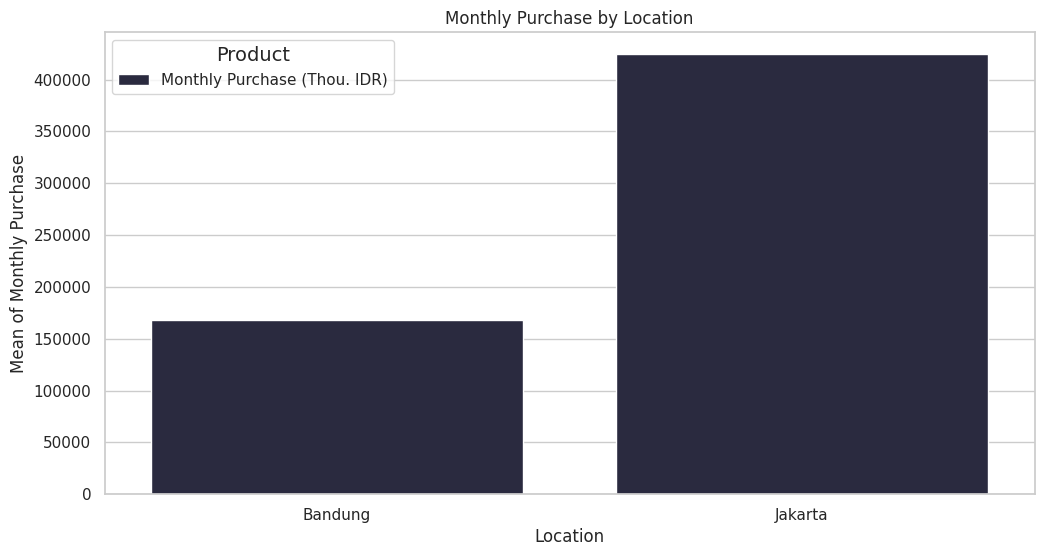

In [ ]:
# Define your custom color palette
custom_palette = ['#272643', '#2c698d', '#bae8e8', '#e3f6f5']

# Assuming 'df' is your DataFrame
# Group the data by 'Location' and sum the product columns
location_product_sum = df.groupby('Location')[['Monthly Purchase (Thou. IDR)']].sum()

# Reset the index to make 'Location' a regular column
location_product_sum.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for plotting
location_product_melted = location_product_sum.melt(id_vars='Location', var_name='Product', value_name='Usage')

# Create a bar plot with the custom color palette
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(data=location_product_melted, x='Location', y='Usage', hue='Product', palette=custom_palette)
plt.title('Monthly Purchase by Location')
plt.xlabel('Location')
plt.ylabel('Mean of Monthly Purchase')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set x-axis labels to be displayed horizontally
plt.xticks(rotation=0)

plt.legend(title='Product', title_fontsize='14')

plt.show()


In [ ]:
def BarChart(column_name):
  # Set the color palette
  colors = ['#272643', '#2c698d', '#e3f6f5', '#e3f6f5','#ffffff']
  sns.set_palette(sns.color_palette(colors))

  # Specify the column you want to create the bar chart for

  # Create the bar chart
  fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
  sns.barplot(x=df[column_name].value_counts().index, y=df[column_name].value_counts(), ax=ax)

  # Add labels and a title
  ax.set_xlabel('Categories')
  ax.set_ylabel('Count')
  ax.set_title(f'Bar Chart of {column_name}')

  # Rotate x-axis labels for better readability (if needed)
  # plt.xticks(rotation=45)

  # Show the bar chart
  plt.show()

In [ ]:
['Payment Method',
       'Churn Label', 'CLTV (Predicted Thou. IDR)'],
      dtype='object')

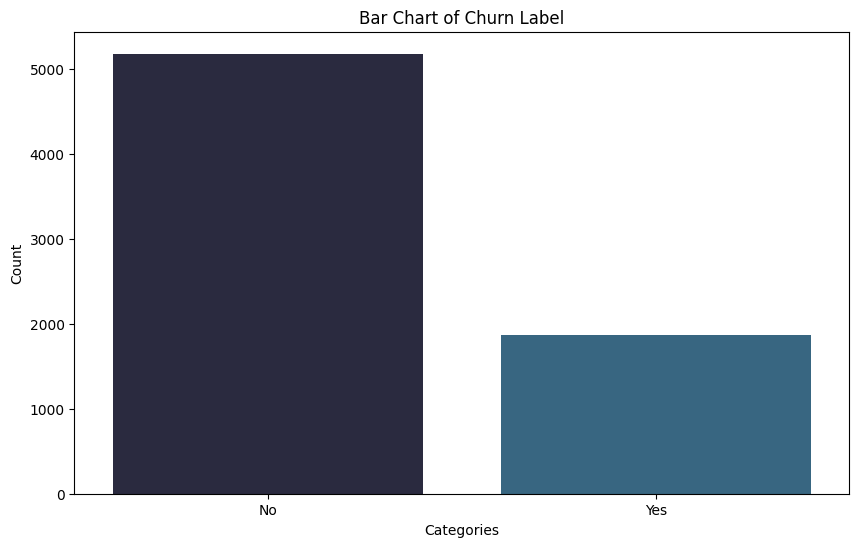

In [ ]:
BarChart('Churn Label')

# Correlation Matrix

In [ ]:
df.corr()

<ipython-input-44-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR)
Tenure Months,1.000000,0.247900,0.396406
Monthly Purchase (Thou. IDR),0.247900,1.000000,0.098693
CLTV (Predicted Thou. IDR),0.396406,0.098693,1.000000


<ipython-input-43-251769c22abf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


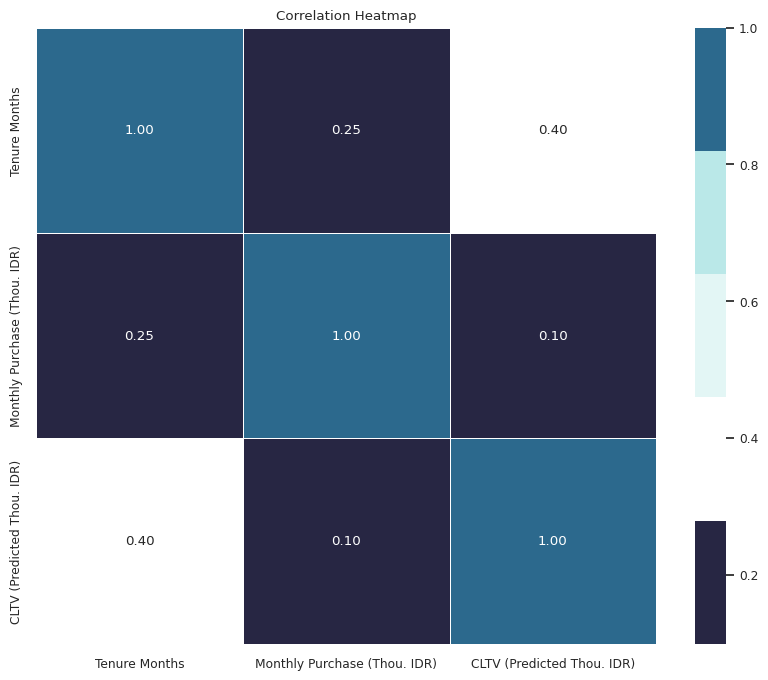

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap with the custom color palette
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(custom_palette), linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")

# Set the x-axis tick labels to be horizontal
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0)

plt.show()

<ipython-input-30-a83dae2067a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


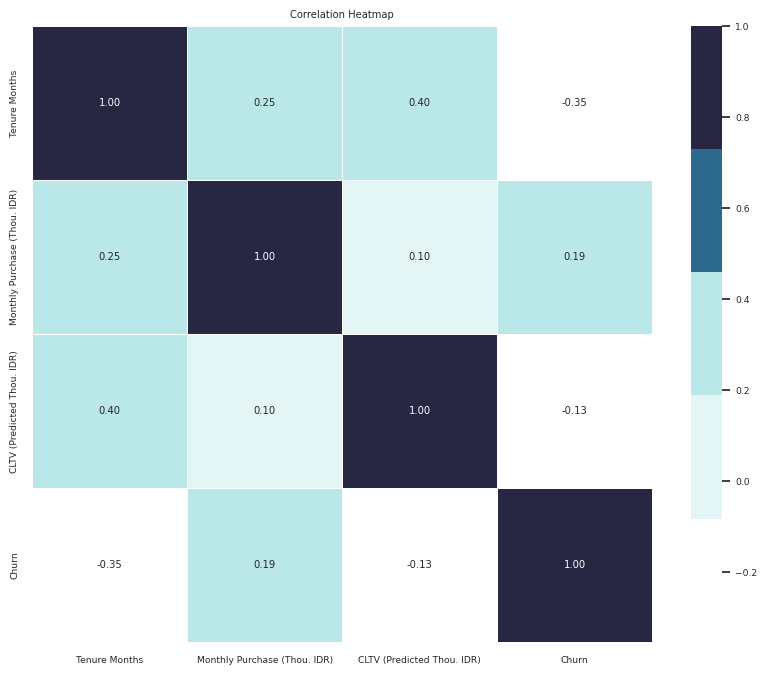

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()


custom_palette  = ['#ffffff', '#e3f6f5', '#bae8e8', '#2c698d', '#272643' ]

# Create a heatmap with the custom color palette
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.6)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(custom_palette), linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")

# Set the x-axis tick labels to be horizontal
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0)

plt.show()

# Relationship between Churn label and categorical features

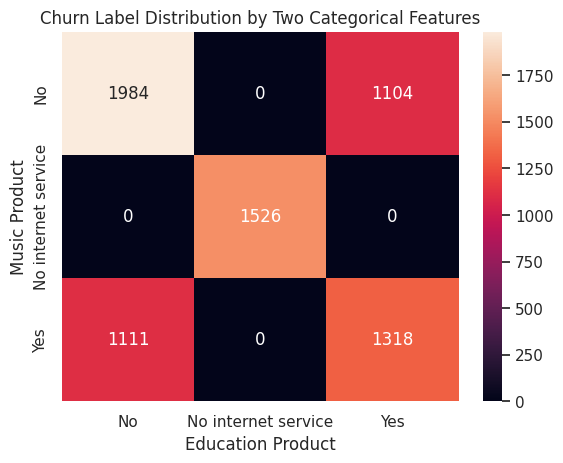

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example using Seaborn
sns.set(style="darkgrid")

# Replace 'categorical_feature1' and 'categorical_feature2' with the names of the two categorical features you want to visualize
cross_tab = pd.crosstab(df["Music Product"], df["Education Product"])
sns.heatmap(cross_tab, annot=True, fmt="d")
plt.title("Churn Label Distribution by Two Categorical Features")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def stackChart(feature):
  # Custom color palette
  custom_palette = ['#2c698d', '#bae8e8', '#ffffff', '#e3f6f5', '#272643']

  # Set the Seaborn style with a white background and grid lines
  sns.set(style="whitegrid")

  # Example using Seaborn
  # Replace 'categorical_feature' with the name of the categorical feature you want to visualize
  sns.countplot(x=feature, hue="Churn Label", data=df, palette=custom_palette)
  plt.title("Churn Label Distribution by " + feature)

  # Set x-axis labels to be displayed horizontally
  plt.xticks(rotation=0)

  plt.show()


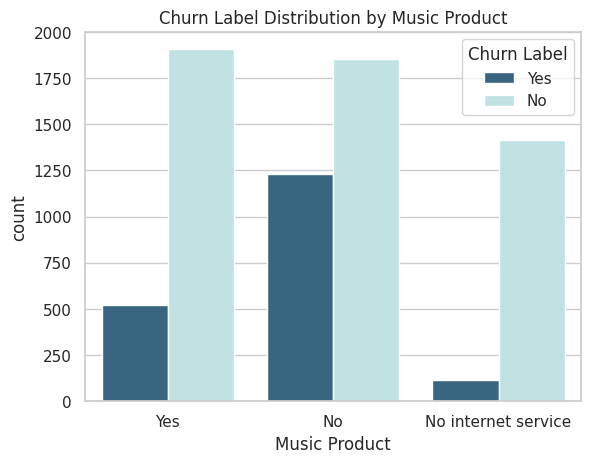

In [ ]:
stackChart('Music Product')

In [ ]:
categorical = ['Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method']

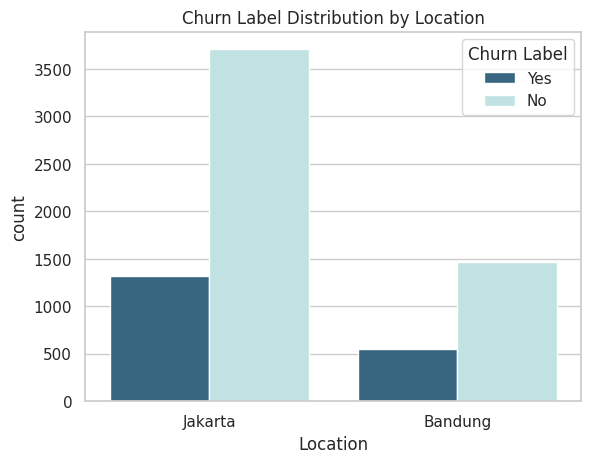

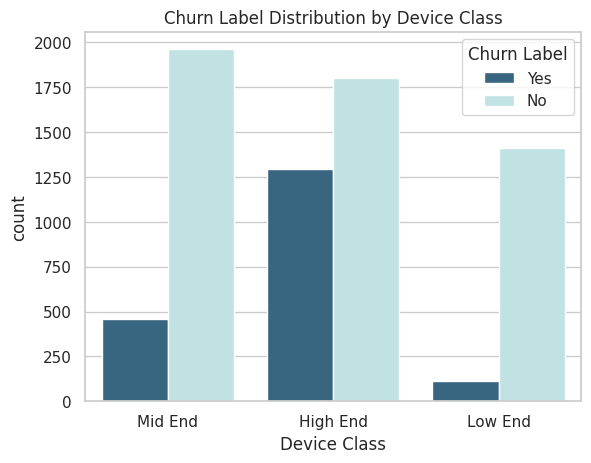

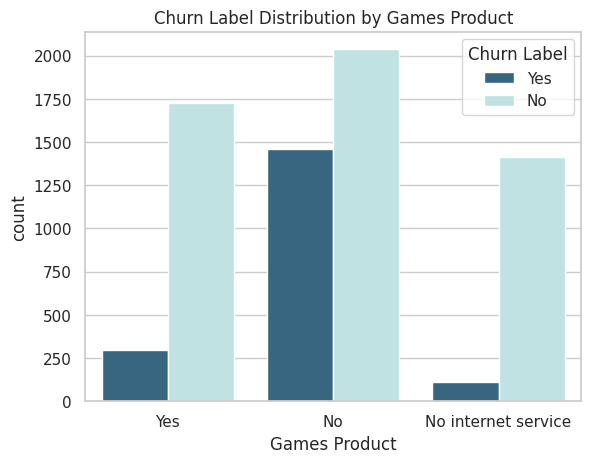

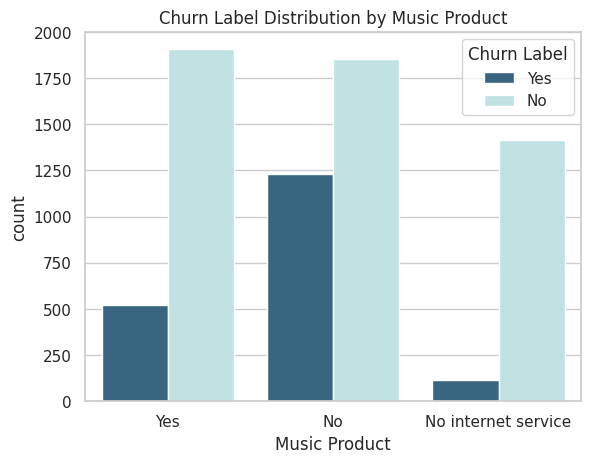

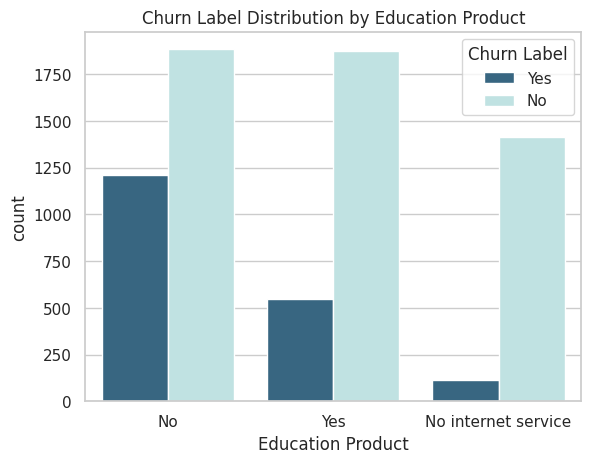

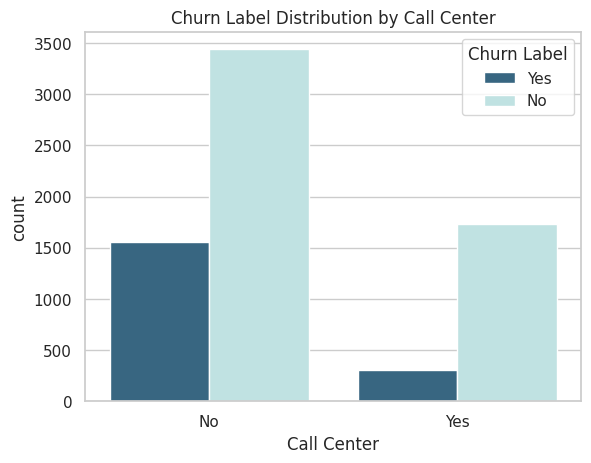

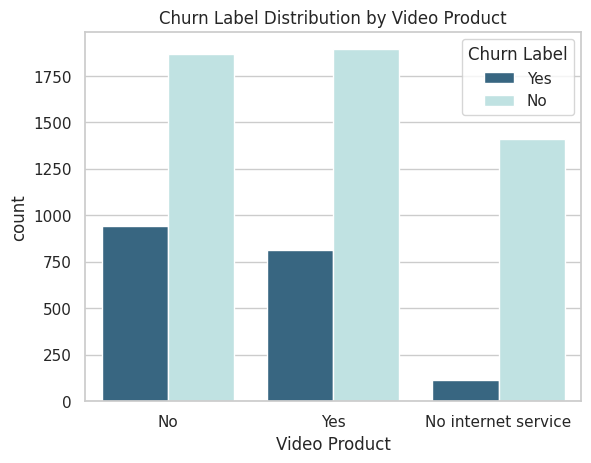

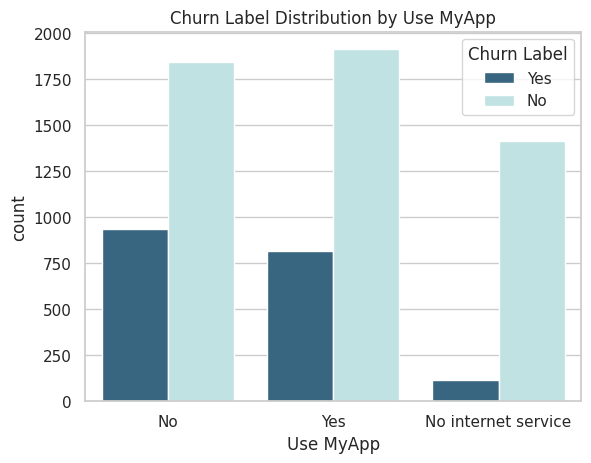

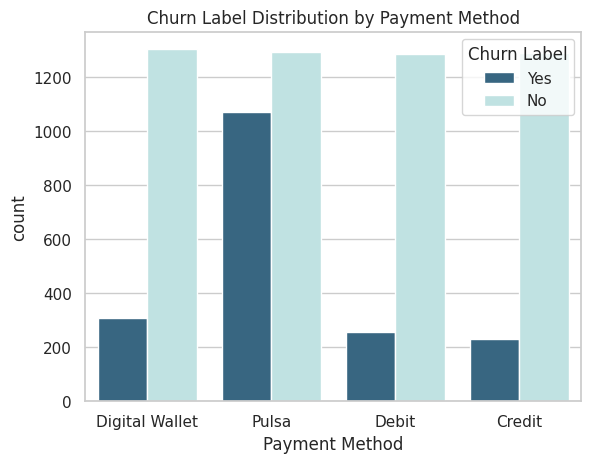

In [ ]:
for i in categorical:
  stackChart(i)

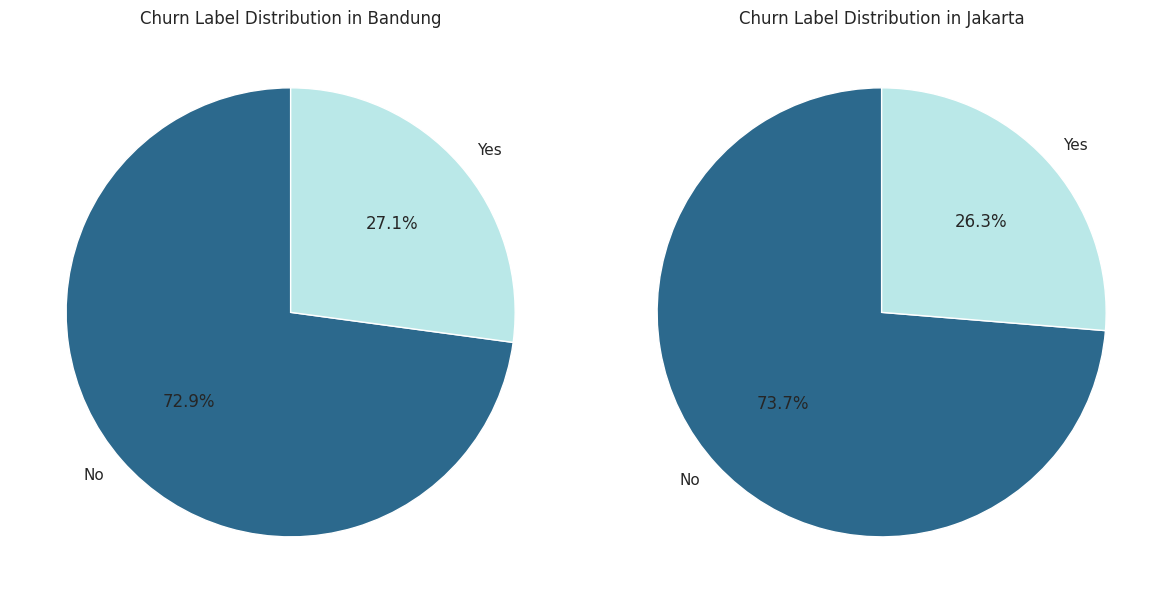

In [ ]:
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#2c698d', '#bae8e8', '#ffffff', '#e3f6f5', '#272643']

# Group data by Location and Churn Label, and count the number of occurrences
churn_counts = df.groupby(['Location', 'Churn Label']).size().reset_index(name='Count')

# Separate data for Bandung and Jakarta
bandung_churn_counts = churn_counts[churn_counts['Location'] == 'Bandung']
jakarta_churn_counts = churn_counts[churn_counts['Location'] == 'Jakarta']

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for Bandung
axes[0].pie(
    bandung_churn_counts['Count'],
    labels=bandung_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[0].set_title('Churn Label Distribution in Bandung')

# Plot for Jakarta
axes[1].pie(
    jakarta_churn_counts['Count'],
    labels=jakarta_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[1].set_title('Churn Label Distribution in Jakarta')

plt.tight_layout()
plt.show()

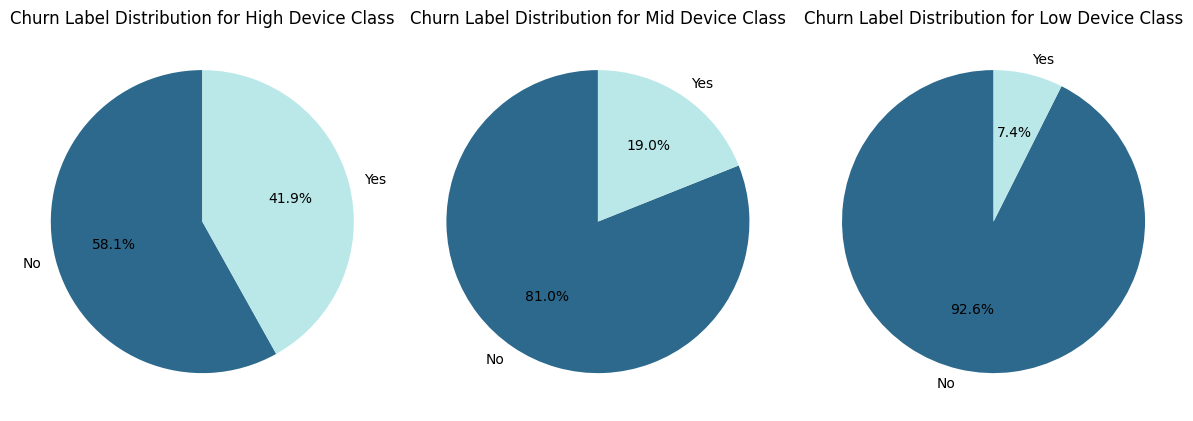

In [ ]:
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#2c698d', '#bae8e8', '#ffffff', '#e3f6f5', '#272643']

# Group data by Location and Churn Label, and count the number of occurrences
churn_counts = df.groupby(['Device Class', 'Churn Label']).size().reset_index(name='Count')

# Separate data for Bandung and Jakarta
high_churn_counts = churn_counts[churn_counts['Device Class'] == 'High End']
mid_churn_counts = churn_counts[churn_counts['Device Class'] == 'Mid End']
low_churn_counts = churn_counts[churn_counts['Device Class'] == 'Low End']

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Plot for high
axes[0].pie(
    high_churn_counts['Count'],
    labels=high_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[0].set_title('Churn Label Distribution for High Device Class')

# Plot for mid
axes[1].pie(
    mid_churn_counts['Count'],
    labels=mid_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[1].set_title('Churn Label Distribution for Mid Device Class')

# Plot for mid
axes[2].pie(
    low_churn_counts['Count'],
    labels=low_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[2].set_title('Churn Label Distribution for Low Device Class')

plt.tight_layout()
plt.show()

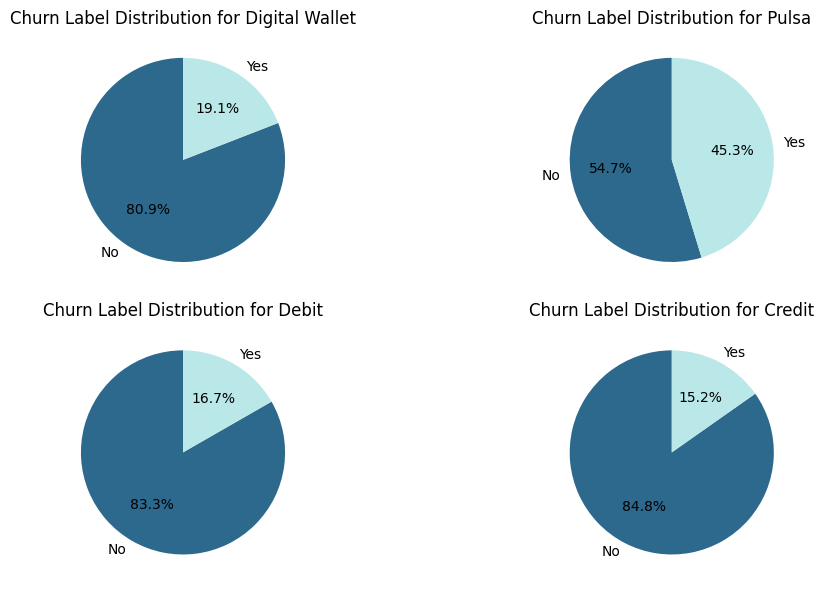

In [ ]:
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#2c698d', '#bae8e8', '#ffffff', '#e3f6f5', '#272643']

# Group data by Location and Churn Label, and count the number of occurrences
churn_counts = df.groupby(['Payment Method', 'Churn Label']).size().reset_index(name='Count')

# Separate data for Bandung and Jakarta
Digital_churn_counts = churn_counts[churn_counts['Payment Method'] == 'Digital Wallet']
Pulsa_churn_counts = churn_counts[churn_counts['Payment Method'] == 'Pulsa']
Debit_churn_counts = churn_counts[churn_counts['Payment Method'] == 'Debit']
Credit_churn_counts = churn_counts[churn_counts['Payment Method'] == 'Credit']

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Plot for high
axes[0][0].pie(
    Digital_churn_counts['Count'],
    labels=Digital_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[0][0].set_title('Churn Label Distribution for Digital Wallet')

# Plot for mid
axes[0][1].pie(
    Pulsa_churn_counts['Count'],
    labels=Pulsa_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[0][1].set_title('Churn Label Distribution for Pulsa')

# Plot for mid
axes[1][0].pie(
    Debit_churn_counts['Count'],
    labels=Debit_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[1][0].set_title('Churn Label Distribution for Debit')

# Plot for mid
axes[1][1].pie(
    Credit_churn_counts['Count'],
    labels=Debit_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[1][1].set_title('Churn Label Distribution for Credit')

plt.tight_layout()
plt.show()

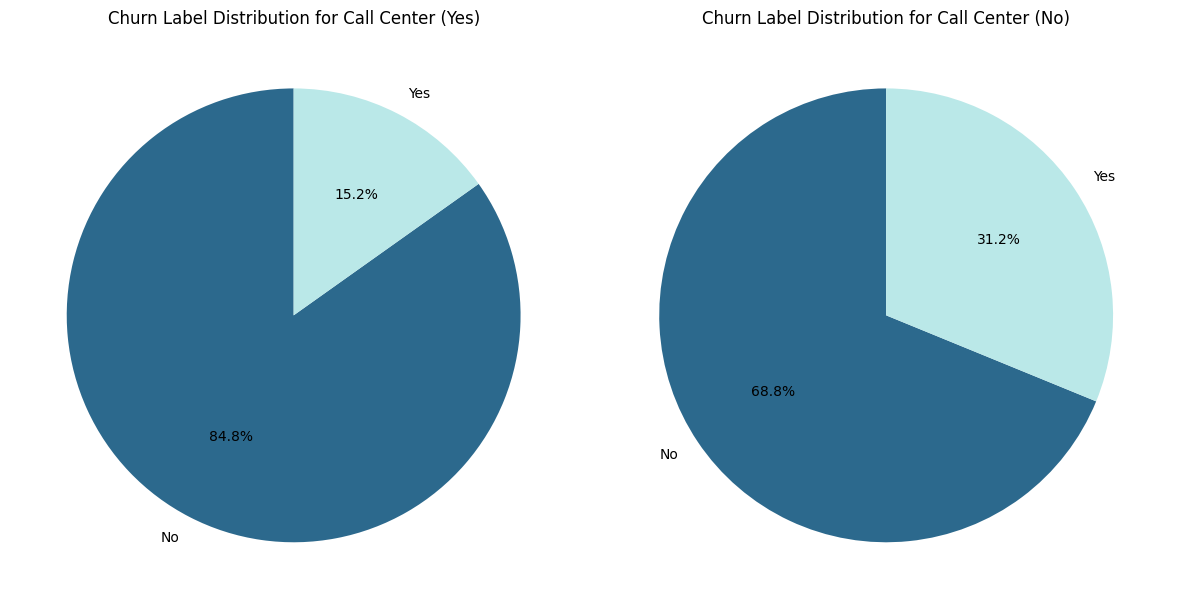

In [ ]:
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#2c698d', '#bae8e8', '#ffffff', '#e3f6f5', '#272643']

# Group data by Location and Churn Label, and count the number of occurrences
churn_counts = df.groupby(['Call Center', 'Churn Label']).size().reset_index(name='Count')

# Separate data for Bandung and Jakarta
Yes_churn_counts = churn_counts[churn_counts['Call Center'] == 'Yes']
No_churn_counts = churn_counts[churn_counts['Call Center'] == 'No']

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for high
axes[0].pie(
    Yes_churn_counts['Count'],
    labels=Yes_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[0].set_title('Churn Label Distribution for Call Center (Yes)')

# Plot for mid
axes[1].pie(
    No_churn_counts['Count'],
    labels=No_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[1].set_title('Churn Label Distribution for Call Center (No)')

plt.tight_layout()
plt.show()

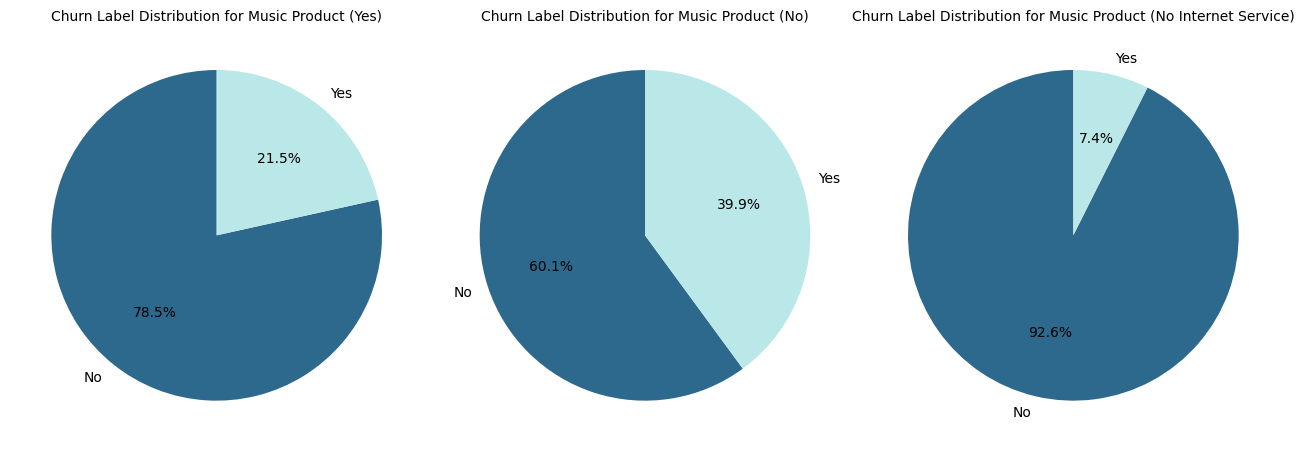

In [ ]:
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#2c698d', '#bae8e8', '#ffffff', '#e3f6f5', '#272643']

# Group data by Location and Churn Label, and count the number of occurrences
churn_counts = df.groupby(['Music Product', 'Churn Label']).size().reset_index(name='Count')

# Separate data for Yes, No, and No Internet Service
Yes_churn_counts = churn_counts[churn_counts['Music Product'] == 'Yes']
No_churn_counts = churn_counts[churn_counts['Music Product'] == 'No']
NoInternet_churn_counts = churn_counts[churn_counts['Music Product'] == 'No internet service']

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))

# Set the font size for labels and percentages
font_size = 10  # Adjust the desired font size

# Plot for Yes
axes[0].pie(
    Yes_churn_counts['Count'],
    labels=Yes_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[0].set_title('Churn Label Distribution for Music Product (Yes)', fontsize=font_size)

# Plot for No
axes[1].pie(
    No_churn_counts['Count'],
    labels=No_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[1].set_title('Churn Label Distribution for Music Product (No)', fontsize=font_size)

# Plot for No Internet Service
axes[2].pie(
    NoInternet_churn_counts['Count'],
    labels=NoInternet_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[2].set_title('Churn Label Distribution for Music Product (No Internet Service)', fontsize=font_size)

plt.tight_layout()
plt.show()


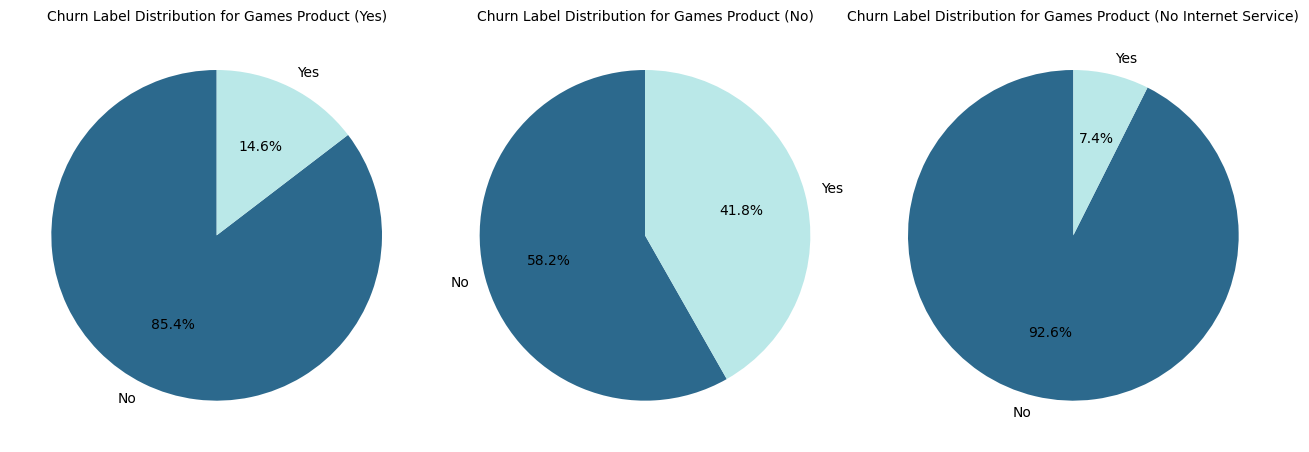

In [ ]:
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#2c698d', '#bae8e8', '#ffffff', '#e3f6f5', '#272643']

# Group data by Location and Churn Label, and count the number of occurrences
churn_counts = df.groupby(['Games Product', 'Churn Label']).size().reset_index(name='Count')

# Separate data for Yes, No, and No Internet Service
Yes_churn_counts = churn_counts[churn_counts['Games Product'] == 'Yes']
No_churn_counts = churn_counts[churn_counts['Games Product'] == 'No']
NoInternet_churn_counts = churn_counts[churn_counts['Games Product'] == 'No internet service']

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))

# Set the font size for labels and percentages
font_size = 10  # Adjust the desired font size

# Plot for Yes
axes[0].pie(
    Yes_churn_counts['Count'],
    labels=Yes_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[0].set_title('Churn Label Distribution for Games Product (Yes)', fontsize=font_size)

# Plot for No
axes[1].pie(
    No_churn_counts['Count'],
    labels=No_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[1].set_title('Churn Label Distribution for Games Product (No)', fontsize=font_size)

# Plot for No Internet Service
axes[2].pie(
    NoInternet_churn_counts['Count'],
    labels=NoInternet_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[2].set_title('Churn Label Distribution for Games Product (No Internet Service)', fontsize=font_size)

plt.tight_layout()
plt.show()


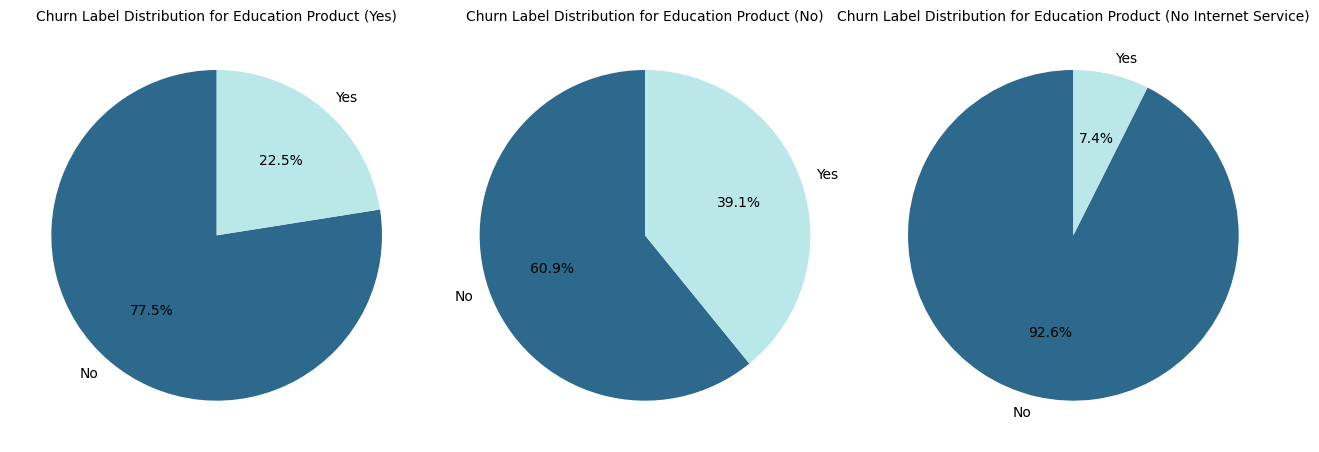

In [ ]:
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#2c698d', '#bae8e8', '#ffffff', '#e3f6f5', '#272643']

# Group data by Location and Churn Label, and count the number of occurrences
churn_counts = df.groupby(['Education Product', 'Churn Label']).size().reset_index(name='Count')

# Separate data for Yes, No, and No Internet Service
Yes_churn_counts = churn_counts[churn_counts['Education Product'] == 'Yes']
No_churn_counts = churn_counts[churn_counts['Education Product'] == 'No']
NoInternet_churn_counts = churn_counts[churn_counts['Education Product'] == 'No internet service']

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))

# Set the font size for labels and percentages
font_size = 10  # Adjust the desired font size

# Plot for Yes
axes[0].pie(
    Yes_churn_counts['Count'],
    labels=Yes_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[0].set_title('Churn Label Distribution for Education Product (Yes)', fontsize=font_size)

# Plot for No
axes[1].pie(
    No_churn_counts['Count'],
    labels=No_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[1].set_title('Churn Label Distribution for Education Product (No)', fontsize=font_size)

# Plot for No Internet Service
axes[2].pie(
    NoInternet_churn_counts['Count'],
    labels=NoInternet_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[2].set_title('Churn Label Distribution for Education Product (No Internet Service)', fontsize=font_size)

plt.tight_layout()
plt.show()


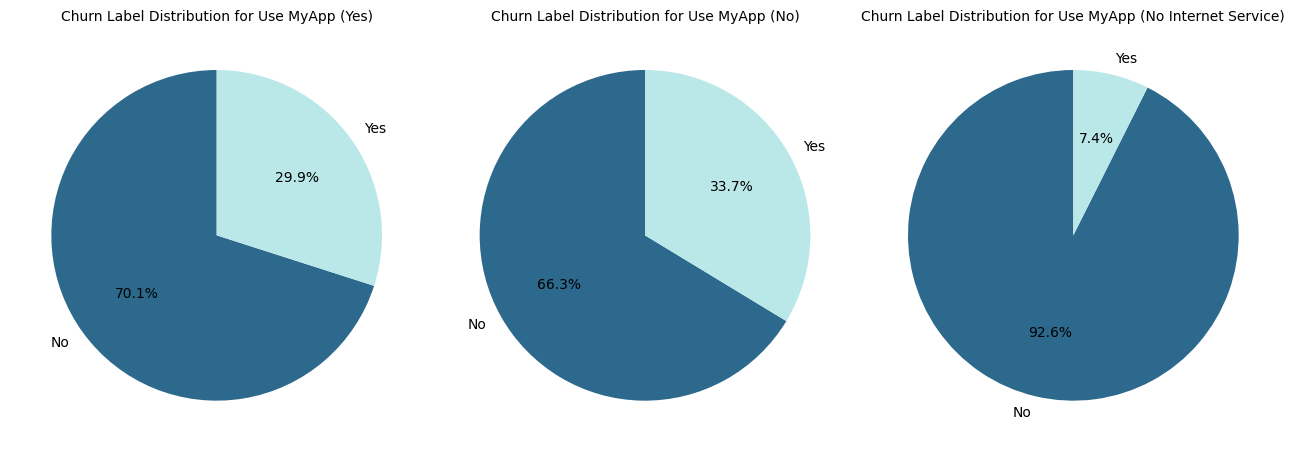

In [ ]:
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#2c698d', '#bae8e8', '#ffffff', '#e3f6f5', '#272643']

# Group data by Location and Churn Label, and count the number of occurrences
churn_counts = df.groupby(['Use MyApp', 'Churn Label']).size().reset_index(name='Count')

# Separate data for Yes, No, and No Internet Service
Yes_churn_counts = churn_counts[churn_counts['Use MyApp'] == 'Yes']
No_churn_counts = churn_counts[churn_counts['Use MyApp'] == 'No']
NoInternet_churn_counts = churn_counts[churn_counts['Use MyApp'] == 'No internet service']

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))

# Set the font size for labels and percentages
font_size = 10  # Adjust the desired font size

# Plot for Yes
axes[0].pie(
    Yes_churn_counts['Count'],
    labels=Yes_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[0].set_title('Churn Label Distribution for Use MyApp (Yes)', fontsize=font_size)

# Plot for No
axes[1].pie(
    No_churn_counts['Count'],
    labels=No_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[1].set_title('Churn Label Distribution for Use MyApp (No)', fontsize=font_size)

# Plot for No Internet Service
axes[2].pie(
    NoInternet_churn_counts['Count'],
    labels=NoInternet_churn_counts['Churn Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
axes[2].set_title('Churn Label Distribution for Use MyApp (No Internet Service)', fontsize=font_size)

plt.tight_layout()
plt.show()


# Plot Distribution

In [ ]:
def DC(feature):
  # Custom color palette
  custom_palette = ['#2c698d', '#bae8e8', '#e3f6f5']

  # Set the Seaborn style with a white background and grid lines
  sns.set(style="whitegrid")

  # Example using Seaborn
  # Replace 'categorical_feature' with the name of the categorical feature you want to visualize
  sns.countplot(x="Device Class", hue=feature, data=df, palette=custom_palette)
  plt.title(feature+ " Distribution by Device Class")

  # Set x-axis labels to be displayed horizontally
  plt.xticks(rotation=0)

  plt.show()

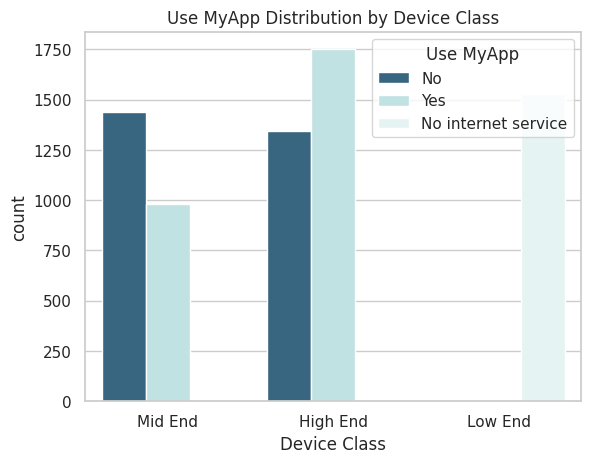

In [ ]:
DC('Use MyApp')

In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom color palette
custom_palette = {'Yes': '#2c698d', 'No': '#bae8e8', 'No internet service': '#e3f6f5'}

def DC(feature):
  # Set the order of the legend labels
  hue_order = ['Yes', 'No', 'No internet service']

  # Set the Seaborn style with a white background and grid lines
  sns.set(style="whitegrid")

  # Example using Seaborn
  sns.countplot(x="Device Class", hue=feature, data=df, palette=custom_palette, hue_order=hue_order)
  plt.title(feature + " Distribution by Device Class")

  # Set x-axis labels to be displayed horizontally
  plt.xticks(rotation=0)

  plt.show()

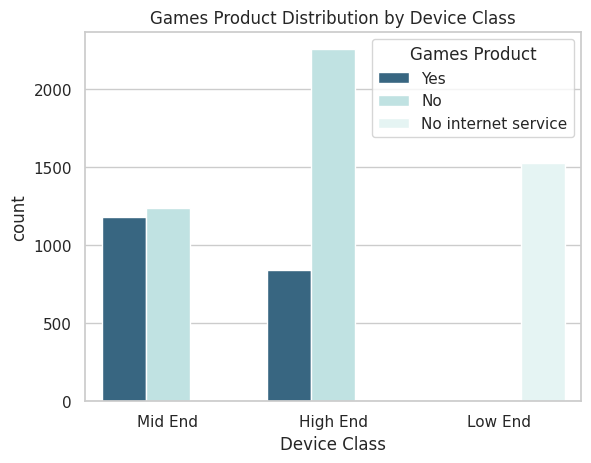

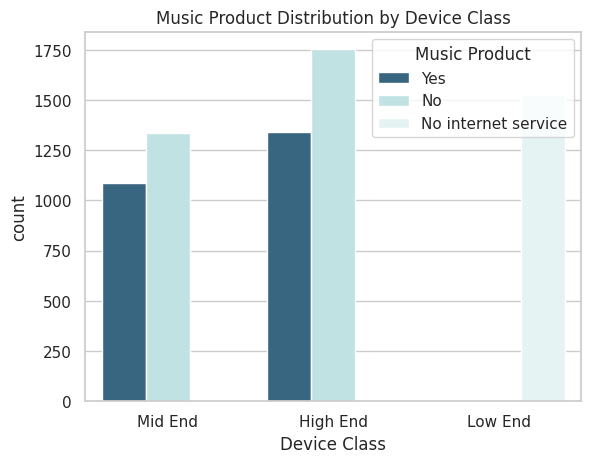

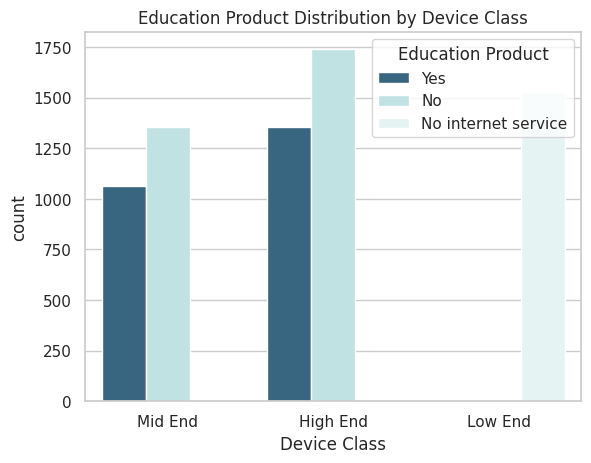

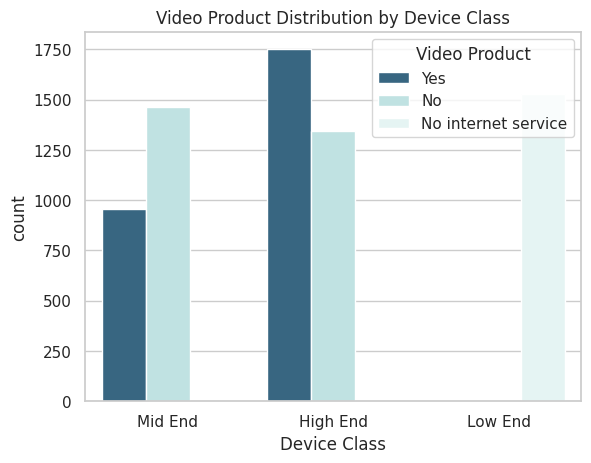

In [ ]:
feature= ['Games Product', 'Music Product', 'Education Product','Video Product']

for i in feature:
  DC(i)

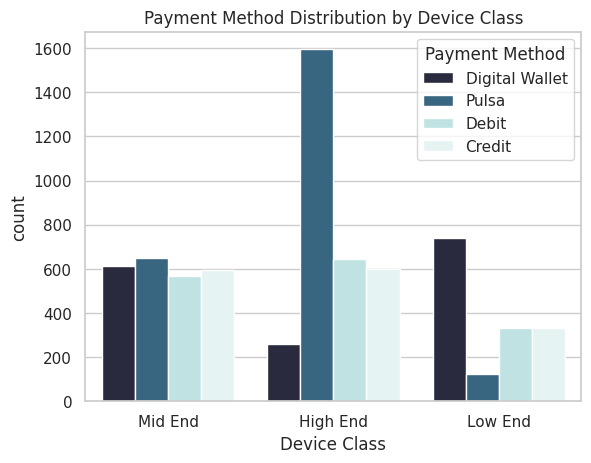

In [ ]:
# Custom color palette
custom_palette = ['#272643','#2c698d', '#bae8e8', '#e3f6f5']

feature='Payment Method'
# Set the Seaborn style with a white background and grid lines
sns.set(style="whitegrid")

# Example using Seaborn
# Replace 'categorical_feature' with the name of the categorical feature you want to visualize
sns.countplot(x="Device Class", hue=feature, data=df, palette=custom_palette)
plt.title(feature+ " Distribution by Device Class")

# Set x-axis labels to be displayed horizontally
plt.xticks(rotation=0)

plt.show()

In [ ]:
feature= ['Games Product', 'Music Product', 'Education Product','Video Product']

for i in feature:
  df.loc[df[i] != 'Yes', i] = 'No'
  df[i].unique()

In [ ]:
feature_numeric = {'Yes':1, 'No':0}

feature= ['Games Product', 'Music Product', 'Education Product','Video Product']

for i in feature:
  df[i].replace(feature_numeric, inplace=True)

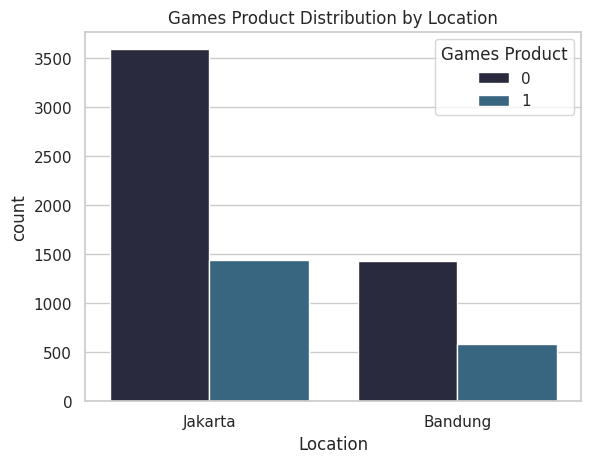

In [ ]:
feature = 'Games Product'
# Custom color palette
custom_palette = ['#272643','#2c698d', '#bae8e8', '#e3f6f5']

# Set the Seaborn style with a white background and grid lines
sns.set(style="whitegrid")

# Example using Seaborn
# Replace 'categorical_feature' with the name of the categorical feature you want to visualize
sns.countplot(x="Location", hue=feature, data=df, palette=custom_palette)
plt.title(feature+ " Distribution by Location")

# Set x-axis labels to be displayed horizontally
plt.xticks(rotation=0)

plt.show()

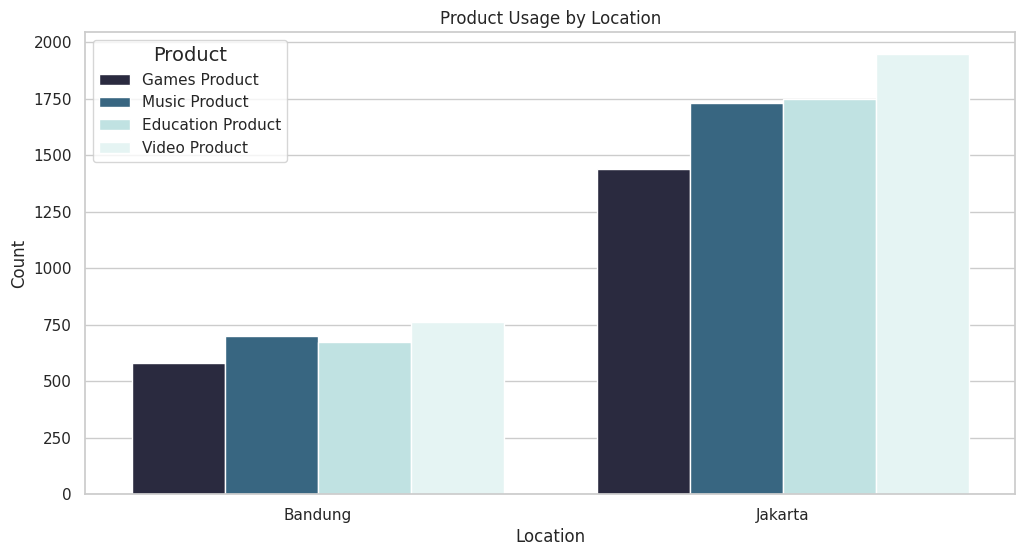

In [ ]:
# Define your custom color palette
custom_palette = ['#272643', '#2c698d', '#bae8e8', '#e3f6f5']

# Assuming 'df' is your DataFrame
# Group the data by 'Location' and sum the product columns
location_product_sum = df.groupby('Location')[['Games Product', 'Music Product', 'Education Product', 'Video Product']].sum()

# Reset the index to make 'Location' a regular column
location_product_sum.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for plotting
location_product_melted = location_product_sum.melt(id_vars='Location', var_name='Product', value_name='Usage')

# Create a bar plot with the custom color palette
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(data=location_product_melted, x='Location', y='Usage', hue='Product', palette=custom_palette)
plt.title('Product Usage by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set x-axis labels to be displayed horizontally
plt.xticks(rotation=0)

plt.legend(title='Product', title_fontsize='14')

plt.show()


In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

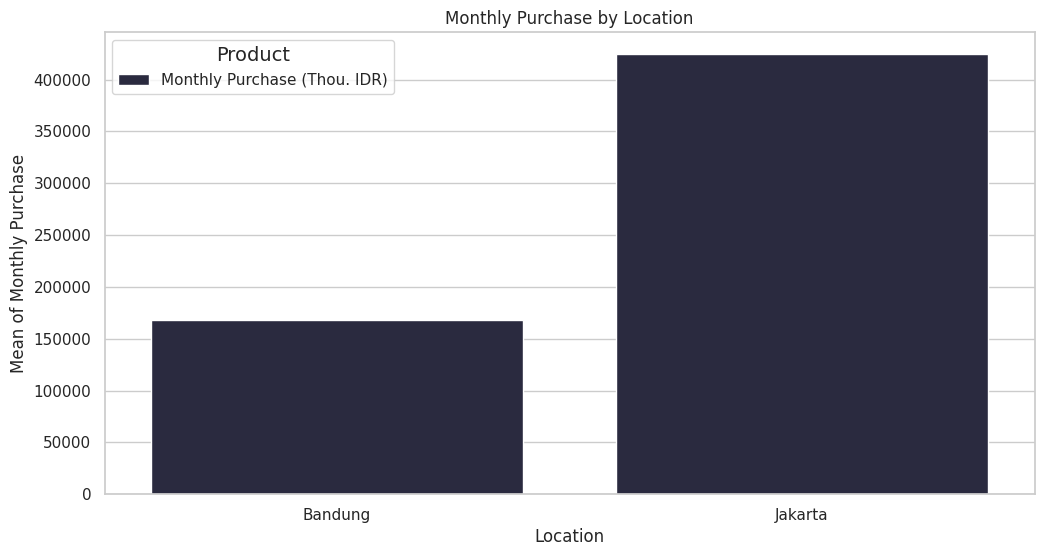

In [ ]:
# Define your custom color palette
custom_palette = ['#272643', '#2c698d', '#bae8e8', '#e3f6f5']

# Assuming 'df' is your DataFrame
# Group the data by 'Location' and sum the product columns
location_product_sum = df.groupby('Location')[['Monthly Purchase (Thou. IDR)']].sum()

# Reset the index to make 'Location' a regular column
location_product_sum.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for plotting
location_product_melted = location_product_sum.melt(id_vars='Location', var_name='Product', value_name='Usage')

# Create a bar plot with the custom color palette
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(data=location_product_melted, x='Location', y='Usage', hue='Product', palette=custom_palette)
plt.title('Monthly Purchase by Location')
plt.xlabel('Location')
plt.ylabel('Mean of Monthly Purchase')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set x-axis labels to be displayed horizontally
plt.xticks(rotation=0)

plt.legend(title='Product', title_fontsize='14')

plt.show()


# Customer Segmentation

In [ ]:
# Library
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Total Products,Churn
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,4210.7,2,1
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,3511.3,0,1
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,6983.6,2,1
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,6503.9,2,1
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,6942.0,3,1


In [ ]:
df.columns

Index(['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase (Thou. IDR)',
       'CLTV (Predicted Thou. IDR)', 'Total Products', 'Churn'],
      dtype='object')

### CLTV

In [ ]:
df_dup = df.copy()
df_dup['CLTV2'] = df_dup['CLTV (Predicted Thou. IDR)']
cluster1= ['CLTV (Predicted Thou. IDR)','CLTV2']
# df[cluster1]

In [ ]:
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for K in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = K, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(df_dup[cluster1])
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

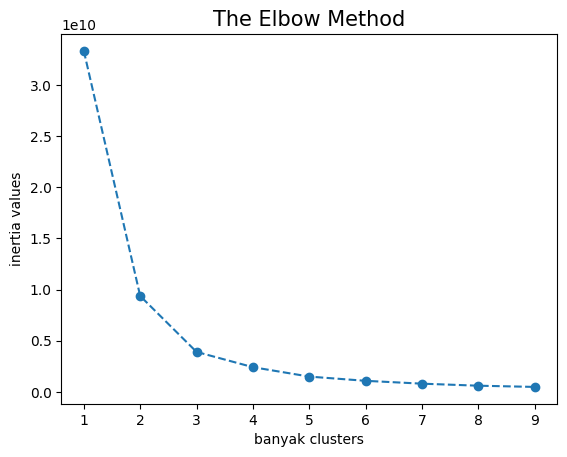

In [ ]:
# Visluasisasi Metode ELBOW untuk mendapatkan nilai optimum dari k:
plt.plot(range(1,10), inertia, 'o--')
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('banyak clusters')
plt.ylabel('inertia values')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(df_dup[cluster1])
target = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['CLTV Cluster'] = target

### Payment Method

In [ ]:
df.loc[df['Payment Method'] != 'Pulsa', 'Payment Method'] = 'Non-Pulsa'
df['Payment Method'].unique()

array(['Non-Pulsa', 'Pulsa'], dtype=object)

In [ ]:
le = LabelEncoder()
df['Payment Method'] = le.fit_transform(df['Payment Method'])

In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

### Encoded Music and Education Product

In [ ]:
le = LabelEncoder()
df['Device Class'] = le.fit_transform(df['Device Class'])
df['Call Center'] = le.fit_transform(df['Call Center'])

### Encode Video Product & Use MyApp

In [ ]:
le = LabelEncoder()
df['Video Product'] = le.fit_transform(df['Video Product'])
df['Use MyApp'] = le.fit_transform(df['Use MyApp'])

### Encoded Device CLass & Call Center, Games Product

In [ ]:
le = LabelEncoder()
df['Device Class'] = le.fit_transform(df['Device Class'])
df['Call Center'] = le.fit_transform(df['Call Center'])

In [ ]:
df['Games Product'] = le.fit_transform(df['Games Product'])

### Education x Music

In [ ]:
df_dup = df.copy()
# df_dup['CLTV2'] = df_dup['CLTV (Predicted Thou. IDR)']
cluster1= ['Education Product', 'Music Product']
# df[cluster1]

In [ ]:
le = LabelEncoder()
df_dup['Music Product'] = le.fit_transform(df_dup['Music Product'])
df_dup['Education Product'] = le.fit_transform(df_dup['Education Product'])

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for K in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = K, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(df_dup[cluster1])
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

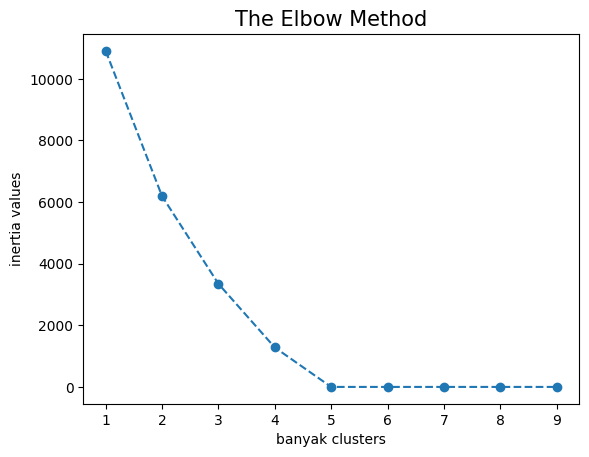

In [ ]:
# Visluasisasi Metode ELBOW untuk mendapatkan nilai optimum dari k:
plt.plot(range(1,10), inertia, 'o--')
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('banyak clusters')
plt.ylabel('inertia values')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=22)
kmeans.fit(df_dup[cluster1])
target = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['Music x Education'] = target

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Music x Education
0,0,2,Jakarta,2,2,Yes,No,0,0,0,0,70.005,Yes,106.816666,-6.2,4210.7,3
1,1,2,Jakarta,0,0,No,No,0,0,0,1,91.910,Yes,106.816666,-6.2,3511.3,0
2,2,8,Jakarta,0,0,No,Yes,0,2,2,1,129.545,Yes,106.816666,-6.2,6983.6,4
3,3,28,Jakarta,0,0,No,Yes,1,2,2,1,136.240,Yes,106.816666,-6.2,6503.9,4
4,4,49,Jakarta,0,0,Yes,Yes,0,2,2,0,134.810,Yes,106.816666,-6.2,6942.0,2


### Cleaning Columns

In [ ]:
df.drop(['Customer ID','Longitude','Latitude'], axis=1, inplace=True)

In [ ]:
df.drop(['Use MyApp', 'Video Product'], axis=1, inplace=True)

In [ ]:
df.drop(['Location'], axis=1, inplace=True)

In [ ]:
df.drop(['Music Product', 'Education Product'], axis=1, inplace=True)

In [ ]:
df.head()

,Tenure Months,Device Class,Games Product,Call Center,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR),Music x Education
0,2,2,2,0,Digital Wallet,70.005,Yes,4210.7,3
1,2,0,0,0,Pulsa,91.910,Yes,3511.3,0
2,8,0,0,0,Pulsa,129.545,Yes,6983.6,4
3,28,0,0,1,Pulsa,136.240,Yes,6503.9,4
4,49,0,0,0,Debit,134.810,Yes,6942.0,2


In [ ]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tenure Months,Device Class,Games Product,Call Center,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Music x Education,Churn
Tenure Months,1.000000,-0.003959,0.325468,0.324221,0.247900,0.396406,0.288201,-0.352229
Device Class,-0.003959,1.000000,0.228090,0.180585,-0.530465,-0.007195,0.012738,-0.240810
Games Product,0.325468,0.228090,1.000000,0.212211,-0.053878,0.140015,0.096164,-0.289309
Call Center,0.324221,0.180585,0.212211,1.000000,0.338304,0.119132,0.264444,-0.164674
Monthly Purchase (Thou. IDR),0.247900,-0.530465,-0.053878,0.338304,1.000000,0.098693,0.327869,0.193356
CLTV (Predicted Thou. IDR),0.396406,-0.007195,0.140015,0.119132,0.098693,1.000000,0.089987,-0.127463
Music x Education,0.288201,0.012738,0.096164,0.264444,0.327869,0.089987,1.000000,-0.093334
Churn,-0.352229,-0.240810,-0.289309,-0.164674,0.193356,-0.127463,-0.093334,1.000000


# MODEL

In [ ]:
X = df.copy()
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [ ]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


In [ ]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

<ipython-input-27-5188bafb37d0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)


In [ ]:
X_upsampled.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Music and Education
0,1869,1,Jakarta,2,0,2,0,0,0,No,1,38.805,0,106.816666,-6.2,5153.2,3
1,1870,34,Jakarta,2,2,0,2,0,0,No,0,74.035,0,106.816666,-6.2,4473.3,4
2,1871,45,Jakarta,2,2,0,2,1,0,No,0,54.990,0,106.816666,-6.2,5599.1,4
3,1872,22,Jakarta,0,0,2,0,0,2,No,0,115.830,0,106.816666,-6.2,5796.7,3
4,1873,10,Jakarta,2,2,0,0,0,0,No,0,38.675,0,106.816666,-6.2,2616.9,0


Text(0.5, 1.0, 'Class Distribution Before Resampling')

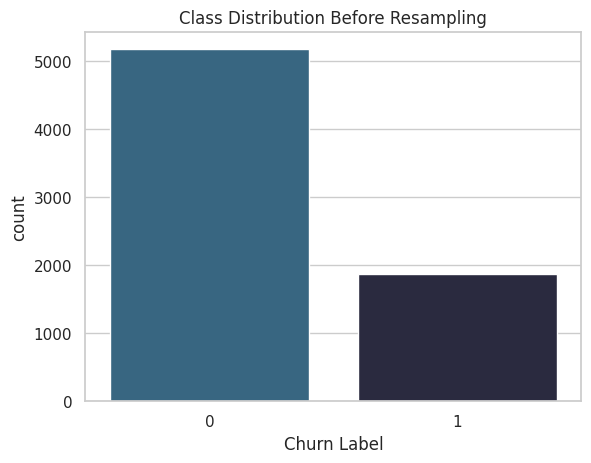

In [ ]:
sns.countplot(x= 'Churn Label', data=df, palette=custom_palette).set_title('Class Distribution Before Resampling')


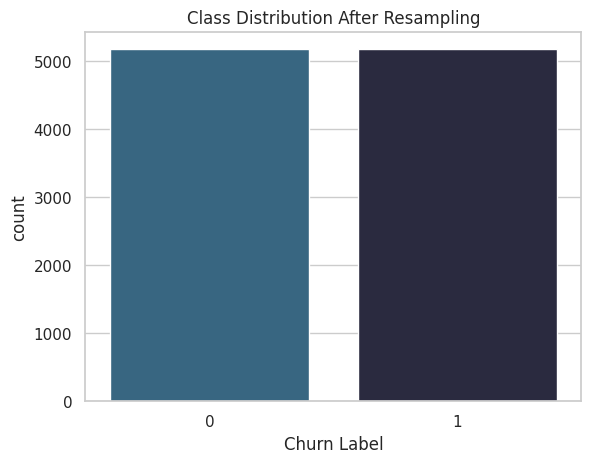

In [ ]:
# Set the color palette
custom_palette = ['#2c698d', '#272643', '#ffffff', '#e3f6f5', '#bae8e8']

# Create a count plot for 'Churn Label' after upsampling
sns.countplot(x='Churn Label', data=X_upsampled, palette=custom_palette)
plt.title('Class Distribution After Resampling')
plt.show()

In [ ]:
len(X_upsampled)

10348

## Random Forest

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_upsampled.drop(columns = drop_columns + ['Churn Label']), X_upsampled['Churn Label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False],  # Method of selecting samples for training each tree
    'random_state': [42]  # Seed for reproducibility
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation (5-fold in this example)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))

NameError: ignored

In [ ]:
clf_forest = RandomForestClassifier(n_estimators = 100, max_depth = 7)

'''RandomForestClassifier(
    bootstrap=False,
    criterion='gini',
    max_depth=20,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=42) '''

clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

Training Data
Accuracy: 0.8088910364822421


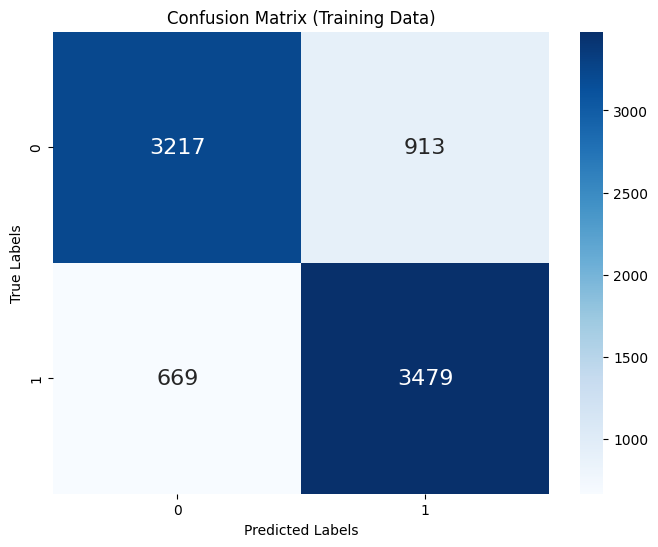

In [ ]:
pred = clf_forest.predict(X_train)
pred_train_accuracy = accuracy_score(y_train, pred)
train_cm = confusion_matrix(y_train, pred)

print('Training Data')
print(f'Accuracy: {pred_train_accuracy}')

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Testing Data
Accuracy: 0.7917874396135266


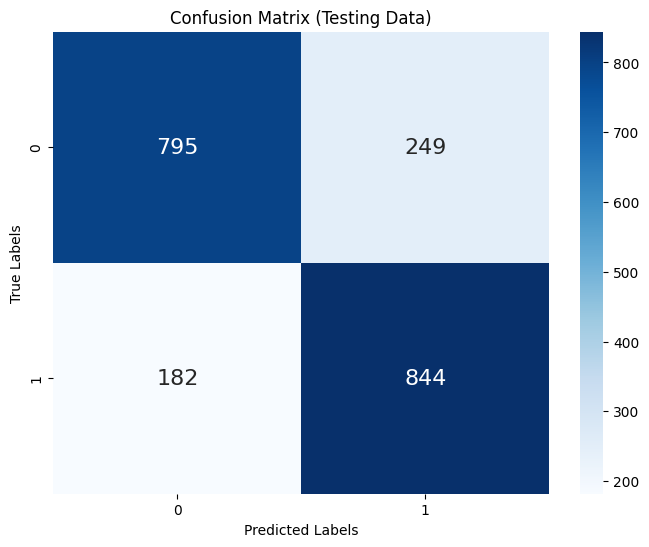

In [ ]:
pred_test = clf_forest.predict(X_test)
pred_test_accuracy = accuracy_score(y_test, pred_test)
test_cm = confusion_matrix(y_test, pred_test)

print('Testing Data')
print(f'Accuracy: {pred_test_accuracy}')

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
cv_scores = cross_val_score(clf_forest, X_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.78743961 0.77415459 0.77415459 0.79227053 0.7826087  0.76932367
 0.79710145 0.78985507 0.76904474 0.80048368]


In [ ]:
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)

print(f'Precision: {precision}')
print(f'Recall score: {recall}')
print(f'f1 scoreL {f1}')

Precision: 0.7721866422689845
Recall score: 0.8226120857699805
f1 scoreL 0.7966021708352997


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training features in X_train, training labels in y_train,
# test features in X_test, and test labels in y_test
# X_train, y_train, X_test, y_test = ...

# Create a random forest classifier (or any other model of your choice)
model = clf_forest

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = model.score(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

# Perform cross-validation and calculate mean cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", mean_cv_score)
print("Stadard Deviation CV Accuracy:", std_cv_score)

# Compare training accuracy with test accuracy and cross-validation accuracy
training_accuracy = model.score(X_train, y_train)

print("Training Accuracy:", training_accuracy)

# Check for potential overfitting
if training_accuracy > test_accuracy and training_accuracy > mean_cv_score:
    print("The model may be overfitting to the training data.")
else:
    print("The model's performance is consistent with test and cross-validation scores.")

Test Accuracy: 0.7880837359098228
Cross-Validation Scores: [0.76965517 0.76965517 0.79448276 0.79558011 0.77762431 0.7859116
 0.78867403 0.77900552 0.78176796 0.79558011]
Mean CV Accuracy: 0.7837936749857115
Stadard Deviation CV Accuracy: 0.009408961931170771
Training Accuracy: 0.8098854065994754
The model may be overfitting to the training data.


The lowest test accuracy is 0.77348066.

In [ ]:
(0.8098854065994754-0.76965517)/0.8104376639514014*100

4.964013691482109

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Create the Random Forest classifier

# Perform grid search with cross-validation (5-fold in this example)
grid_search = GridSearchCV(logistic_regression, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters:  {'C': 10, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.74


In [ ]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training Data
Accuracy: 0.7440202947571877


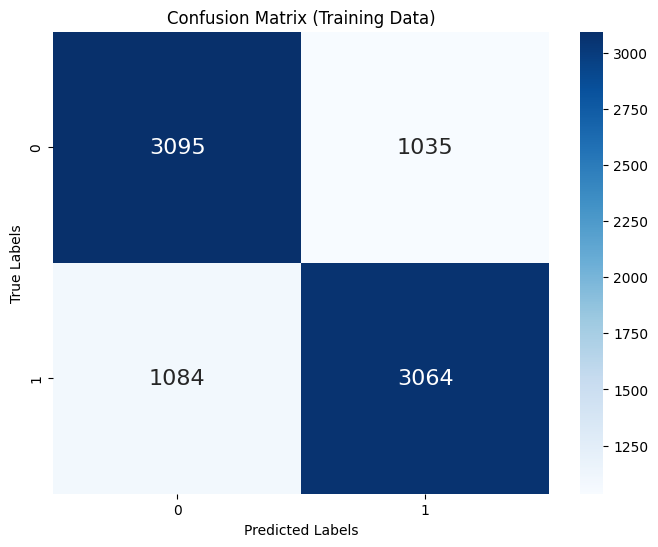

In [ ]:
pred = logistic_regression.predict(X_train)
pred_train_accuracy = accuracy_score(y_train, pred)
train_cm = confusion_matrix(y_train, pred)

print('Training Data')
print(f'Accuracy: {pred_train_accuracy}')

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Testing Data
Accuracy: 0.7473429951690821


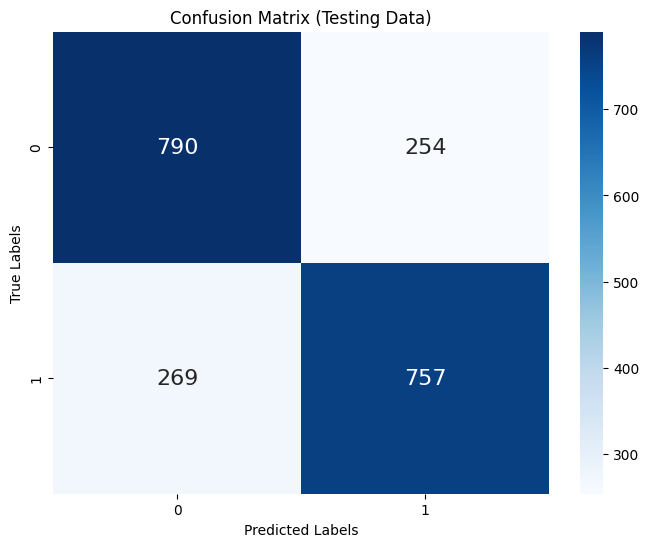

In [ ]:
pred_test = logistic_regression.predict(X_test)
pred_test_accuracy = accuracy_score(y_test, pred_test)
test_cm = confusion_matrix(y_test, pred_test)

print('Testing Data')
print(f'Accuracy: {pred_test_accuracy}')

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
print(precision)
print(recall)
print(f1)

0.7487636003956478
0.7378167641325536
0.7432498772704959


In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.76086957 0.73550725 0.73671498 0.73792271 0.74516908 0.73550725
 0.7705314  0.75362319 0.72188634 0.72914148]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training features in X_train, training labels in y_train,
# test features in X_test, and test labels in y_test
# X_train, y_train, X_test, y_test = ...

# Create a random forest classifier (or any other model of your choice)
model = logistic_regression

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = model.score(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

# Perform cross-validation and calculate mean cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", mean_cv_score)
print("Stadard Deviation CV Accuracy:", std_cv_score)

# Compare training accuracy with test accuracy and cross-validation accuracy
training_accuracy = model.score(X_train, y_train)

print("Training Accuracy:", training_accuracy)

# Check for potential overfitting
if training_accuracy > test_accuracy and training_accuracy > mean_cv_score:
    print("The model may be overfitting to the training data.")
else:
    print("The model's performance is consistent with test and cross-validation scores.")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Test Accuracy: 0.7526570048309179


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.72689655 0.74206897 0.73517241 0.75138122 0.72237569 0.76243094
 0.74723757 0.74309392 0.72099448 0.72099448]
Mean CV Accuracy: 0.7372646218327301
Stadard Deviation CV Accuracy: 0.013609311966353791
Training Accuracy: 0.7396106585668921
The model's performance is consistent with test and cross-validation scores.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Scores: [0.72689655 0.74206897 0.73517241 0.75138122 0.72237569 0.76243094
 0.74723757 0.74309392 0.72099448 0.72099448]
Mean CV Accuracy: 0.7372646218327301
Stadard Deviation CV Accuracy: 0.013609311966353791
Training Accuracy: 0.7396106585668921

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {'n_neighbors': [1, 2, 3, 4, 5],
              'metric': ['euclidean', 'manhattan']}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform randomized search with cross-validation (5-fold in this example)
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(random_search.best_score_))

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)

 # Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Training Data
Accuracy: 0.7965692196182653


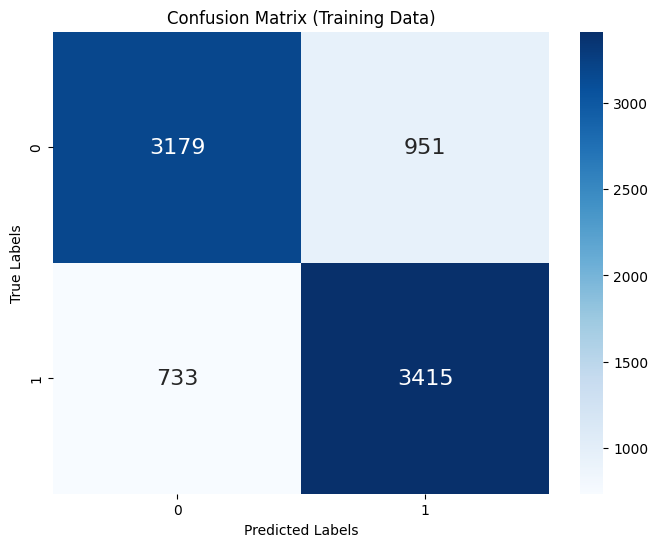

In [ ]:
pred = knn.predict(X_train)
pred_train_accuracy = accuracy_score(y_train, pred)
train_cm = confusion_matrix(y_train, pred)

print('Training Data')
print(f'Accuracy: {pred_train_accuracy}')

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Testing Data
Accuracy: 0.7483091787439613


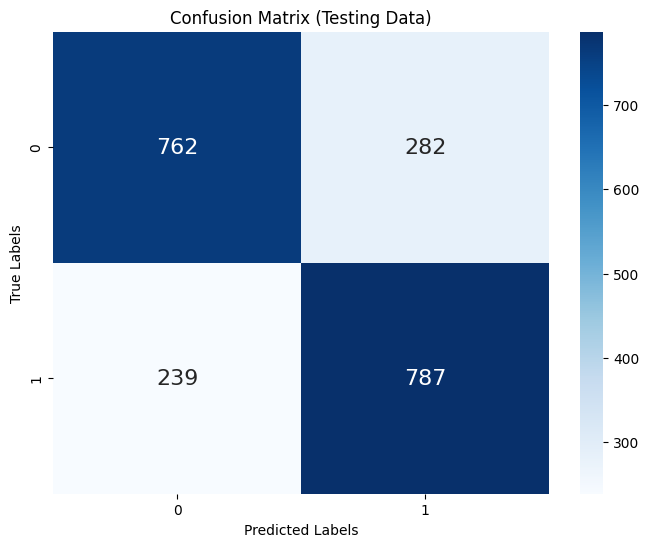

In [ ]:
pred_test = knn.predict(X_test)
pred_test_accuracy = accuracy_score(y_test, pred_test)
test_cm = confusion_matrix(y_test, pred_test)

print('Testing Data')
print(f'Accuracy: {pred_test_accuracy}')

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.69806763 0.73429952 0.73309179 0.73067633 0.71859903 0.71376812
 0.74758454 0.71980676 0.7146312  0.70858525]
Mean CV Accuracy: 0.7219110164788625


In [ ]:
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)

print(f'Precision: {precision}')
print(f'Recall score: {recall}')
print(f'f1 scoreL {f1}')

Precision: 0.7362020579981291
Recall score: 0.767056530214425
f1 scoreL 0.7513126491646779


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training features in X_train, training labels in y_train,
# test features in X_test, and test labels in y_test
# X_train, y_train, X_test, y_test = ...

# Create a random forest classifier (or any other model of your choice)
model = knn

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = model.score(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

# Perform cross-validation and calculate mean cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", mean_cv_score)
print("Stadard Deviation CV Accuracy:", std_cv_score)

# Compare training accuracy with test accuracy and cross-validation accuracy
training_accuracy = model.score(X_train, y_train)

print("Training Accuracy:", training_accuracy)

# Check for potential overfitting
if training_accuracy > test_accuracy and training_accuracy > mean_cv_score:
    print("The model may be overfitting to the training data.")
else:
    print("The model's performance is consistent with test and cross-validation scores.")

Test Accuracy: 0.7687600644122383
Cross-Validation Scores: [0.72827586 0.76551724 0.77655172 0.75414365 0.76519337 0.76933702
 0.76933702 0.77071823 0.74585635 0.74447514]
Mean CV Accuracy: 0.758940560106687
Stadard Deviation CV Accuracy: 0.014460873484321622
Training Accuracy: 0.8804362833080215
The model may be overfitting to the training data.


## SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type: linear or radial basis function (RBF)
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3]  # Degree of the polynomial kernel function ('poly' only)
}

# Create the SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation (5-fold in this example)
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))


Best Parameters:  {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.92


In [ ]:
svm = SVC(kernel = 'linear')

 # Fit the model on the training data
svm.fit(X_train, y_train)

SVC(kernel='linear')

Training Data
Accuracy: 0.7440202947571877


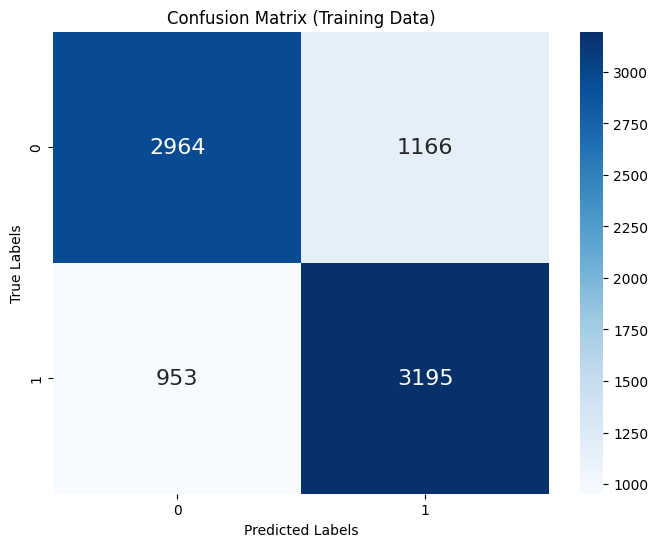

In [ ]:
pred = svm.predict(X_train)
pred_train_accuracy = accuracy_score(y_train, pred)
train_cm = confusion_matrix(y_train, pred)

print('Training Data')
print(f'Accuracy: {pred_train_accuracy}')

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Testing Data
Accuracy: 0.7458937198067633


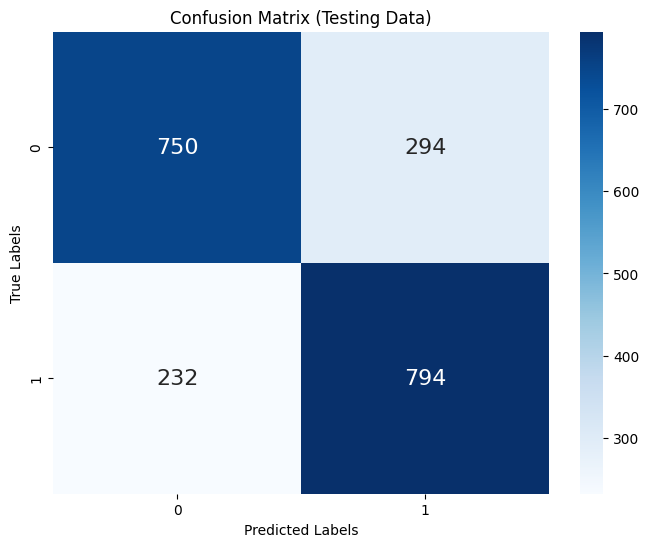

In [ ]:
pred_test = svm.predict(X_test)
pred_test_accuracy = accuracy_score(y_test, pred_test)
test_cm = confusion_matrix(y_test, pred_test)

print('Testing Data')
print(f'Accuracy: {pred_test_accuracy}')

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm, X_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.75483092 0.73550725 0.74637681 0.75483092 0.75       0.72584541
 0.7705314  0.75       0.72551391 0.72067715]
Mean CV Accuracy: 0.7434113757309172


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training features in X_train, training labels in y_train,
# test features in X_test, and test labels in y_test
# X_train, y_train, X_test, y_test = ...

# Create a random forest classifier (or any other model of your choice)
model = svm

# Evaluate the model on the test data
test_accuracy = model.score(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

# Perform cross-validation and calculate mean cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", mean_cv_score)
print("Stadard Deviation CV Accuracy:", std_cv_score)

# Compare training accuracy with test accuracy and cross-validation accuracy
training_accuracy = model.score(X_train, y_train)

print("Training Accuracy:", training_accuracy)

# Check for potential overfitting
if training_accuracy > test_accuracy and training_accuracy > mean_cv_score:
    print("The model may be overfitting to the training data.")
else:
    print("The model's performance is consistent with test and cross-validation scores.")

Test Accuracy: 0.7446054750402576
Cross-Validation Scores: [0.74534161 0.7494824  0.74810214 0.75621547 0.71201657]
Mean CV Accuracy: 0.7422316400337058
Stadard Deviation CV Accuracy: 0.01552550108979668
Training Accuracy: 0.7478945188457822
The model may be overfitting to the training data.


## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 1.0]  # Fraction of features used for fitting the trees
}

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(booster='gbtree', random_state=42)

# Perform grid search with cross-validation (5-fold in this example)
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.82


In [ ]:
# Create an XGBoost classifier with the best hyperparameters
hyperparameters = {
    'learning_rate': 0.01,
    'max_depth':7,
    'n_estimators': 200,
    'reg_alpha': 0.05,
    'reg_lambda': 0.01
}
xgb_1 = xgb.XGBClassifier(**hyperparameters)

# Fit the classifier to the training data
xgb_1.fit(X_train, y_train)

# Model 2
# Create an XGBoost model
xgb_2 = xgb.XGBClassifier()

# Fit the model on the training data
xgb_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training Data
Accuracy: 0.8459772892002899


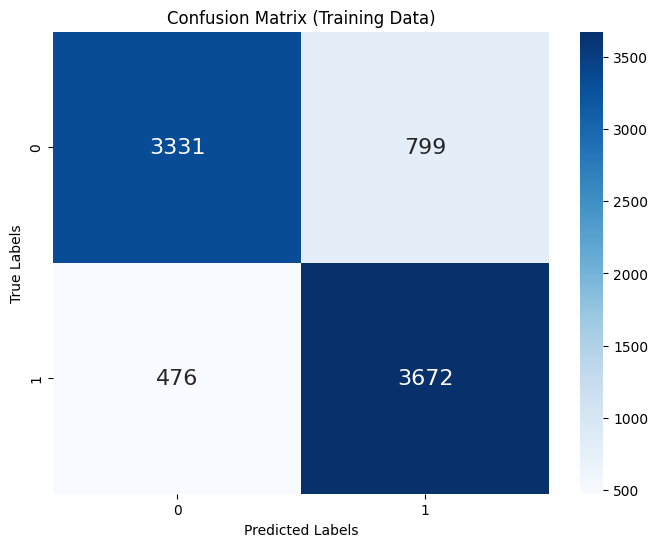

In [ ]:
pred = xgb_1.predict(X_train)
pred_train_accuracy = accuracy_score(y_train, pred)
train_cm = confusion_matrix(y_train, pred)

print('Training Data')
print(f'Accuracy: {pred_train_accuracy}')

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Testing Data
Accuracy: 0.81256038647343


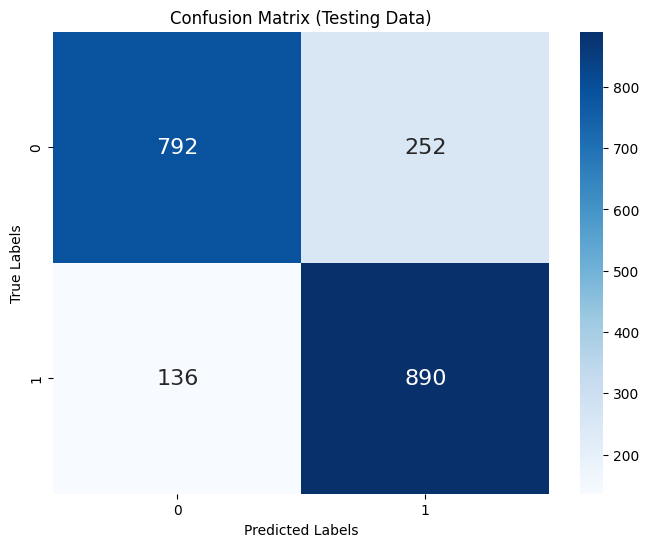

In [ ]:
pred_test = xgb_1.predict(X_test)
pred_test_accuracy = accuracy_score(y_test, pred_test)
test_cm = confusion_matrix(y_test, pred_test)

print('Testing Data')
print(f'Accuracy: {pred_test_accuracy}')

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_1, X_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.80193237 0.79589372 0.79227053 0.81280193 0.80797101 0.78985507
 0.80193237 0.81280193 0.79081016 0.808948  ]


In [ ]:
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)

print(f'Precision: {precision}')
print(f'Recall score: {recall}')
print(f'f1 scoreL {f1}')

Precision: 0.7793345008756567
Recall score: 0.8674463937621832
f1 scoreL 0.8210332103321032


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training features in X_train, training labels in y_train,
# test features in X_test, and test labels in y_test
# X_train, y_train, X_test, y_test = ...

# Create a random forest classifier (or any other model of your choice)
model = xgb_1

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = model.score(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

# Perform cross-validation and calculate mean cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", mean_cv_score)

# Compare training accuracy with test accuracy and cross-validation accuracy
training_accuracy = model.score(X_train, y_train)

print("Training Accuracy:", training_accuracy)

# Check for potential overfitting
if training_accuracy > test_accuracy and training_accuracy > mean_cv_score:
    print("The model may be overfitting to the training data.")
else:
    print("The model's performance is consistent with test and cross-validation scores.")

Test Accuracy: 0.779460482725982
Cross-Validation Scores: [0.78296146 0.77586207 0.77281947 0.75760649 0.77687627]
Mean CV Accuracy: 0.7732251521298175
Training Accuracy: 0.8892494929006085
The model may be overfitting to the training data.


Training Data
Accuracy: 0.9478701825557809


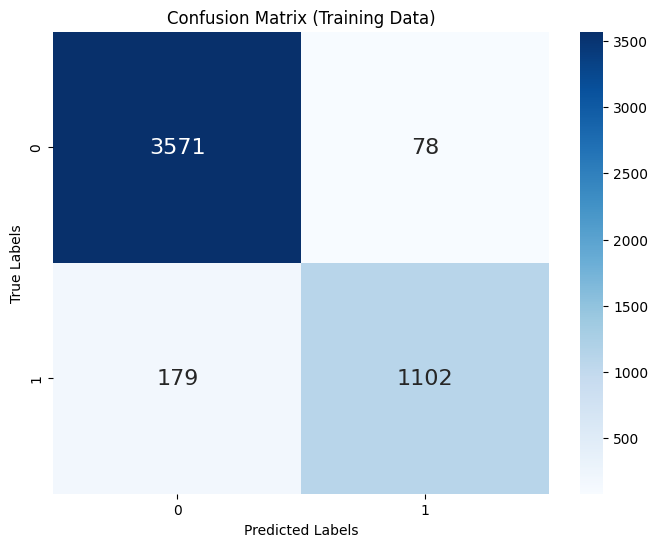

In [ ]:
pred = xgb_2.predict(X_train)
pred_train_accuracy = accuracy_score(y_train, pred)
train_cm = confusion_matrix(y_train, pred)

print('Training Data')
print(f'Accuracy: {pred_train_accuracy}')

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Testing Data
Accuracy: 0.8541062801932368


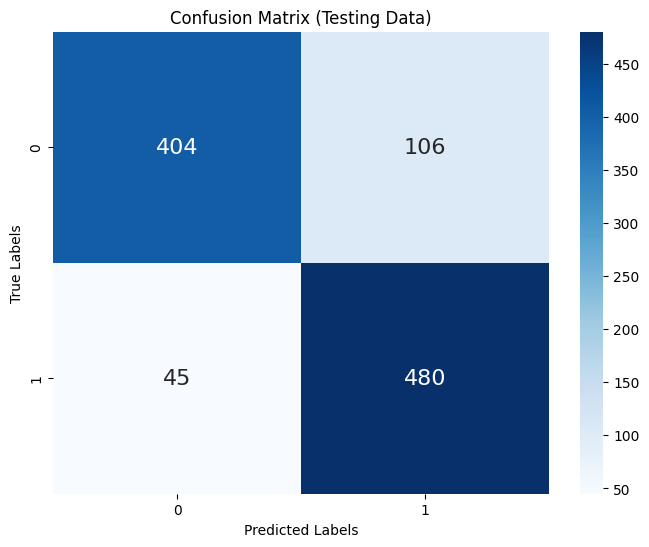

In [ ]:
pred_test = xgb_2.predict(X_test)
pred_test_accuracy = accuracy_score(y_test, pred_test)
test_cm = confusion_matrix(y_test, pred_test)

print('Testing Data')
print(f'Accuracy: {pred_test_accuracy}')

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training features in X_train, training labels in y_train,
# test features in X_test, and test labels in y_test
# X_train, y_train, X_test, y_test = ...

# Create a random forest classifier (or any other model of your choice)
model = xgb_2

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = model.score(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

# Perform cross-validation and calculate mean cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", mean_cv_score)

# Compare training accuracy with test accuracy and cross-validation accuracy
training_accuracy = model.score(X_train, y_train)

print("Training Accuracy:", training_accuracy)

# Check for potential overfitting
if training_accuracy > test_accuracy and training_accuracy > mean_cv_score:
    print("The model may be overfitting to the training data.")
else:
    print("The model's performance is consistent with test and cross-validation scores.")

Test Accuracy: 0.8541062801932368
Cross-Validation Scores: [0.86580784 0.83950617 0.86688137 0.8528464  0.85123523]
Mean CV Accuracy: 0.8552554032885297
Training Accuracy: 0.9385804789004617
The model may be overfitting to the training data.


## Adaboost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for AdaBoostClassifier
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners (base estimators)
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate for the weak learners
    'base_estimator': [None, DecisionTreeClassifier(max_depth=7), DecisionTreeClassifier(max_depth=8), DecisionTreeClassifier(max_depth=9), DecisionTreeClassifier(max_depth=10)]
}

# Create the AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test data
best_adaboost = grid_search.best_estimator_
test_predictions = best_adaboost.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy: {:.2f}".format(test_accuracy))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Parameters:  {'base_estimator': DecisionTreeClassifier(max_depth=10), 'learning_rate': 1.0, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.89
Test Accuracy: 0.93


Best Parameters:  {'base_estimator': DecisionTreeClassifier(max_depth=8), 'learning_rate': 1.0, 'n_estimators': 150}


Best Cross-Validation Accuracy: 0.89


Test Accuracy: 0.92

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators=90, learning_rate = 0.25)

# Fit the model to your data
adaboost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.25, n_estimators=90)

Training Data
Accuracy: 0.820971249093984


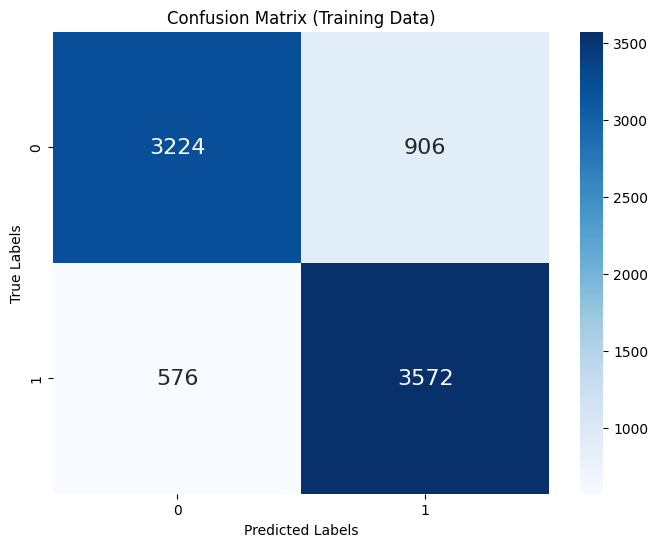

In [ ]:
pred = adaboost.predict(X_train)
pred_train_accuracy = accuracy_score(y_train, pred)
train_cm = confusion_matrix(y_train, pred)

print('Training Data')
print(f'Accuracy: {pred_train_accuracy}')

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Testing Data
Accuracy: 0.8101449275362319


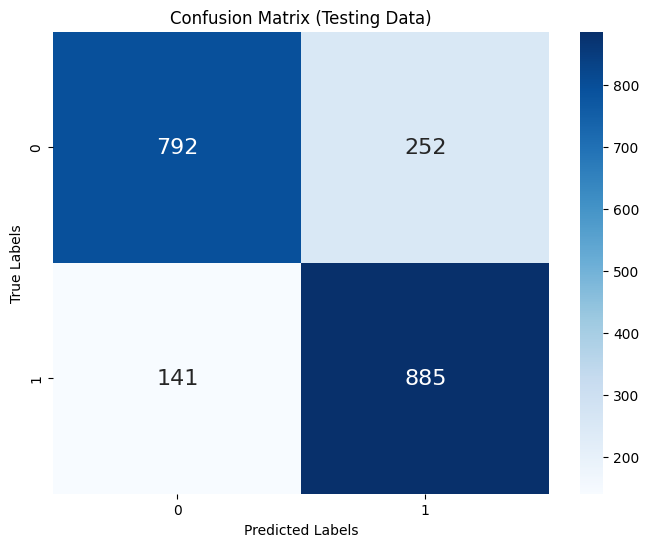

In [ ]:
pred_test = adaboost.predict(X_test)
pred_test_accuracy = accuracy_score(y_test, pred_test)
test_cm = confusion_matrix(y_test, pred_test)

print('Testing Data')
print(f'Accuracy: {pred_test_accuracy}')

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_1, X_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.80193237 0.79589372 0.79227053 0.81280193 0.80797101 0.78985507
 0.80193237 0.81280193 0.79081016 0.808948  ]


In [ ]:
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)

print(f'Precision: {precision}')
print(f'Recall score: {recall}')
print(f'f1 scoreL {f1}')

Precision: 0.7783641160949868
Recall score: 0.8625730994152047
f1 scoreL 0.8183079056865463


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training features in X_train, training labels in y_train,
# test features in X_test, and test labels in y_test
# X_train, y_train, X_test, y_test = ...

# Create a random forest classifier (or any other model of your choice)
model = adaboost

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = model.score(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

# Perform cross-validation and calculate mean cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", mean_cv_score)
print("Stadard Deviation CV Accuracy:", std_cv_score)

# Compare training accuracy with test accuracy and cross-validation accuracy
training_accuracy = model.score(X_train, y_train)

print("Training Accuracy:", training_accuracy)

# Check for potential overfitting
if training_accuracy > test_accuracy and training_accuracy > mean_cv_score:
    print("The model may be overfitting to the training data.")
else:
    print("The model's performance is consistent with test and cross-validation scores.")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Accuracy: 0.7463322290582111


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-Validation Scores: [0.7535497  0.74239351 0.74036511 0.73630832 0.7515213 ]
Mean CV Accuracy: 0.7448275862068965
Stadard Deviation CV Accuracy: 0.006622648161182377
Training Accuracy: 0.9993914807302231
The model may be overfitting to the training data.
